In [1]:
%config IPCompleter.greedy=True

### Project Information

* The objective of this challenge is to build a predictive model that accurately estimates the percentage of households per ward that are female-headed and living below a particular income threshold, by using data points that can be collected through other means without an intensive household survey like the census.

* The error metric of this challenge is Root Mean Squared Error

#### Target Variable Description
The target variable of interest is the percentage of households per ward that are both female-headed and earn an annual income that is below R19,600

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
plt.rcParams['figure.figsize'] = [14, 8]

In [6]:
pd.set_option('display.max_column', 200) # So that we can see the full descriptions

In [7]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')

In [14]:
train.head()

ward  total_households  total_individuals     target     dw_00  \
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841   
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940   
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545   
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914   
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575   

      dw_01     dw_02     dw_03     dw_04     dw_05     dw_06     dw_07  \
0  0.000846  0.005490  0.000676  0.000000  0.001372  0.005750  0.031466   
1  0.001253  0.004402  0.000000  0.002301  0.001323  0.007575  0.123547   
2  0.004517  0.008891  0.003986  0.007735  0.000956  0.006686  0.022632   
3  0.000000  0.006129  0.000000  0.000813  0.037245  0.005255  0.068909   
4  0.000655  0.001473  0.000598  0.006999  0.000818  0.004985  0.009150   

      dw_08     dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01  \
0  0.008080  0.002823  0.001431  0.008224      0      0  0.260191  0.607898   
1  0.151910  0.001486  0.001253  0.008010      0      0  0.290228  0.549788   
2  0.129902  0.000000  0.000000  0.004150      0      0  0.186435  0.677005   
3  0.218786  0.000000  0.000000  0.002947      0      0  0.281229  0.593281   
4  0.015382  0.008693  0.000000  0.000673      0      0  0.196687  0.517578   

     psa_02    psa_03    psa_04    stv_00    stv_01    car_00    car_01  \
0  0.000188  0.010018  0.121705  0.283468  0.716532  0.273727  0.726273   
1  0.000000  0.021336  0.138647  0.103641  0.896359  0.144638  0.855362   
2  0.000489  0.021315  0.114757  0.165772  0.834228  0.272220  0.727780   
3  0.000579  0.007249  0.117663  0.087768  0.912232  0.127875  0.872125   
4  0.000989  0.005148  0.279598  0.345975  0.654025  0.404507  0.595493   

     lln_00    lln_01    lan_00    lan_01    lan_02    lan_03    lan_04  \
0  0.118825  0.881175  0.832913  0.012336  0.001923  0.050939  0.000000   
1  0.066903  0.933097  0.879655  0.008445  0.000328  0.011249  0.000842   
2  0.100009  0.899991  0.565546  0.015991  0.001566  0.111270  0.004795   
3  0.029155  0.970845  0.743812  0.006530  0.001188  0.086423  0.006735   
4  0.133552  0.866448  0.422623  0.014352  0.000842  0.121869  0.007027   

     lan_05    lan_06    lan_07    lan_08    lan_09    lan_10    lan_11  \
0  0.000564  0.076088  0.006371  0.003663  0.000375  0.000372  0.004943   
1  0.001759  0.032431  0.030844  0.001646  0.001308  0.000994  0.000000   
2  0.002552  0.148083  0.139687  0.003165  0.000165  0.000779  0.001692   
3  0.002308  0.103244  0.038284  0.003080  0.000582  0.000000  0.000197   
4  0.002613  0.147363  0.081706  0.003044  0.000169  0.000643  0.001201   

     lan_12  lan_13    lan_14     pg_00     pg_01     pg_02     pg_03  \
0  0.002719       0  0.006793  0.357455  0.563166  0.004260  0.072996   
1  0.002439       0  0.028061  0.698428  0.278006  0.003695  0.015835   
2  0.002509       0  0.002200  0.672452  0.154225  0.002181  0.167494   
3  0.007442       0  0.000174  0.728014  0.263831  0.001806  0.000956   
4  0.004276       0  0.192272  0.753491  0.129654  0.004523  0.106953   

      pg_04    lgt_00     pw_00     pw_01     pw_02     pw_03     pw_04  \
0  0.002123  0.919424  0.742692  0.214027  0.019968  0.002848  0.007537   
1  0.004036  0.959259  0.309294  0.576844  0.018946  0.014566  0.057127   
2  0.003649  0.826164  0.323393  0.483376  0.083010  0.057560  0.010358   
3  0.005393  0.986151  0.677437  0.314194  0.002689  0.000000  0.000669   
4  0.005380  0.957376  0.771106  0.194743  0.009699  0.004859  0.001290   

      pw_05     pw_06  pw_07  pw_08 ADM4_PCODE        lat        lon        NL  
0  0.000000  0.012928      0      0  ZA4161001 -29.682270  24.734743  0.292039  
1  0.019092  0.004131      0      0  ZA4161002 -29.119311  24.757737  3.207775  
2  0.001421  0.040881      0      0  ZA4161003 -29.142276  25.094093  0.000000  
3  0.000000  0.005011      0      0

In [11]:
train.shape

(2822, 63)

In [22]:
missing_data = train.isnull().sum()
missing_data.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

There are no missing values.

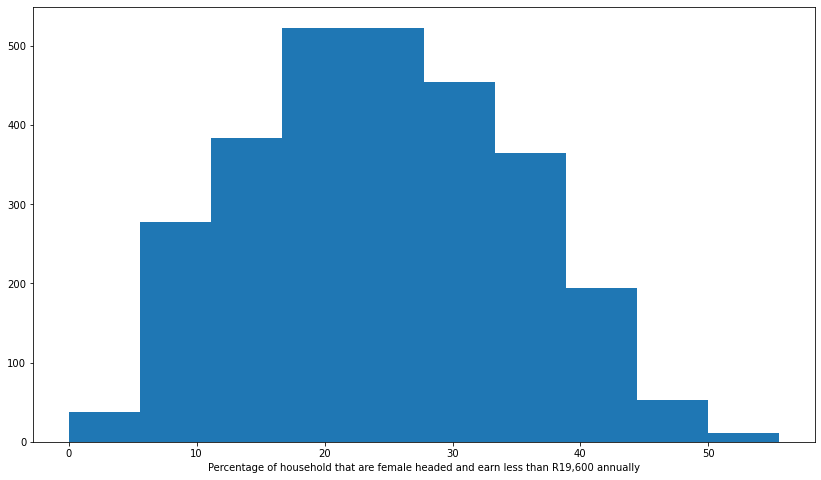

In [32]:
#Check the distribution of the target variable
plt.hist(train['target'])
plt.xlabel('Percentage of household that are female headed and earn less than R19,600 annually')
plt.show()

Seems the data follows a normal distribution.

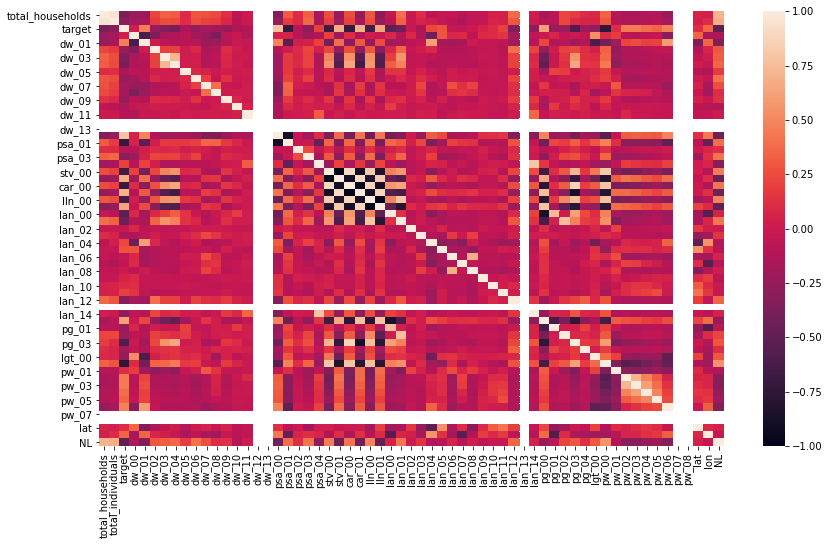

In [34]:
#Making a heatmap of correlations
correlation = train.corr()
sns.heatmap(train.corr())

Some unusual correlations are noticed;
* Some variables are perfectly correlated with all others. E.g dw_12, dw_13, lan_13, pw_07,pw_08 Investigate!!!
* Some variables have a sharp negative correlation with another var with say of the same group(stv_00 & stv_01),(car_00 & car_01),(lln_00 & lln_01)

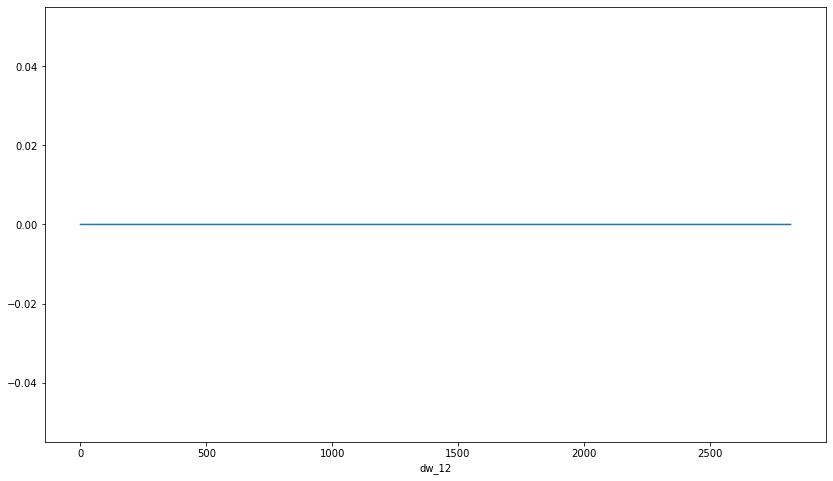

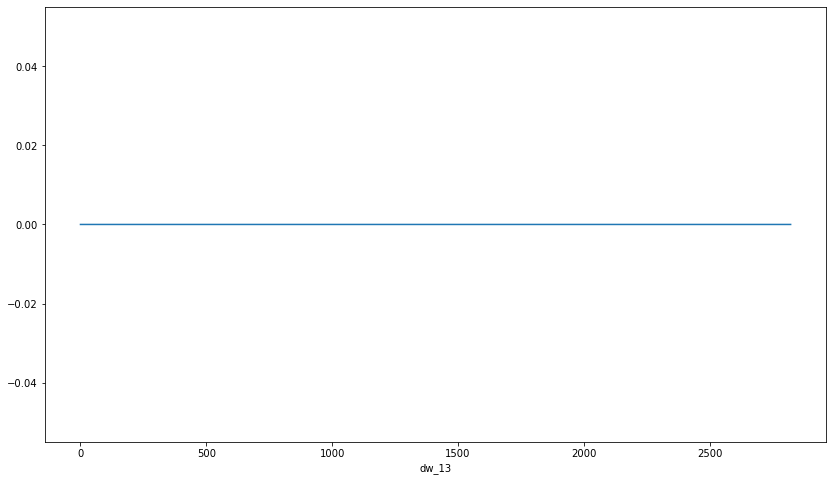

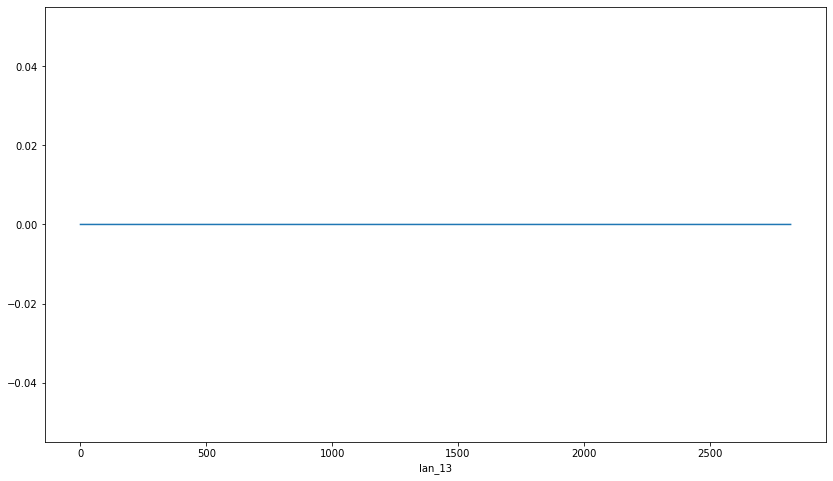

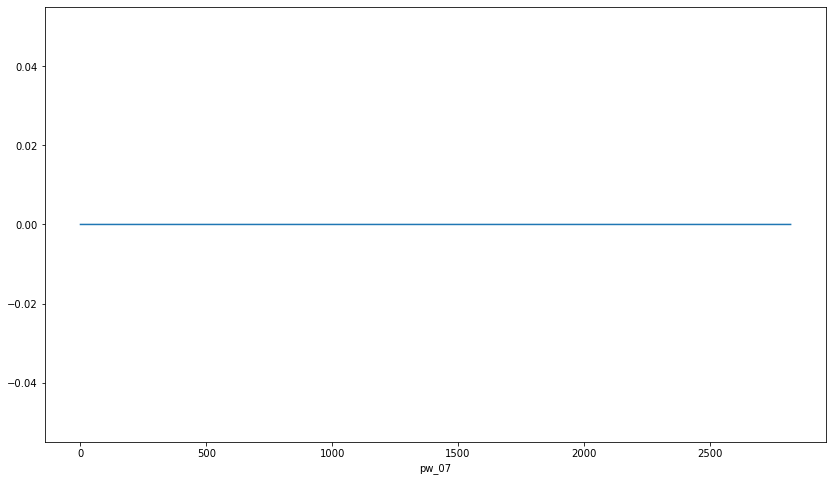

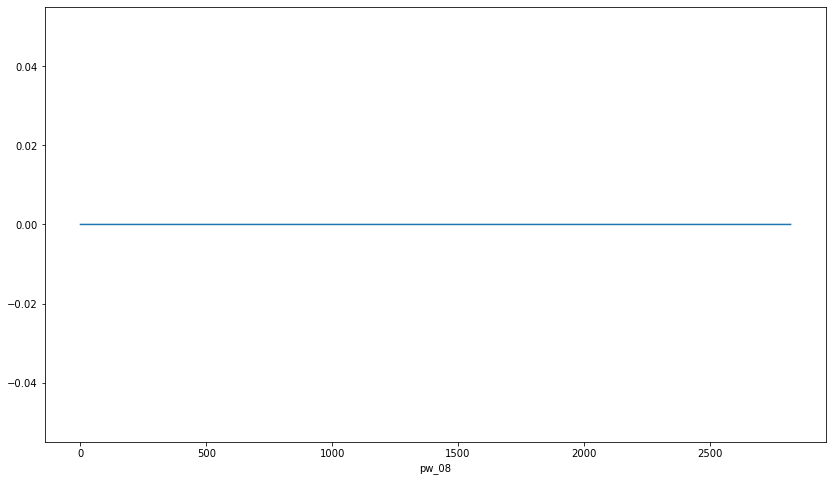

In [51]:
#Plotting the distribution of the variables perfectly correlated with all other variables
perfect_vars = ['dw_12','dw_13','lan_13','pw_07','pw_08']
for var in perfect_vars:    
    plt.plot(train[var])
    plt.xlabel(var)
    #plt.xlabel('Percentage of household that are female headed and earn less than R19,600 annually')
    plt.show()

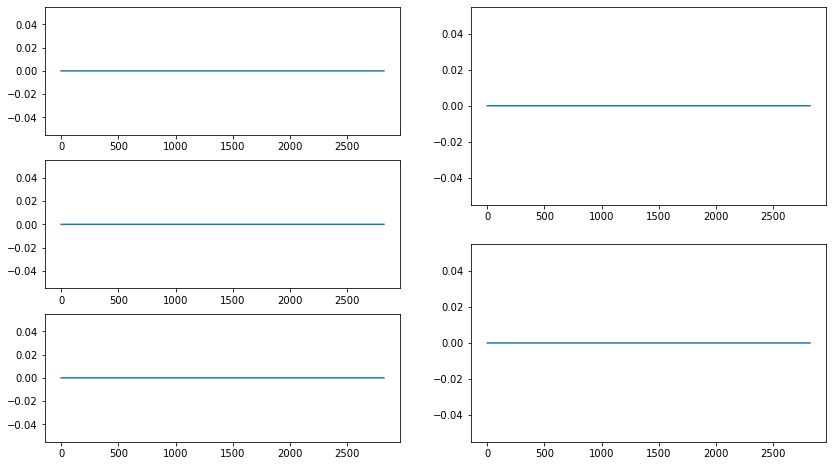

In [52]:
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(325)
ax4 = fig.add_subplot(222)
ax5 = fig.add_subplot(224)

ax1.plot(train['dw_12'])
ax2.plot(train['dw_13'])
ax3.plot(train['lan_13'])
ax4.plot(train['pw_07'])
ax5.plot(train['pw_08'])


plt.show()

Now it makes sense,they are all zero. Which suggests that we drop them

In [42]:
correlation['stv_00'].loc['stv_01']

-1.0000000000000004

In [43]:
correlation['car_00'].loc['car_01']

-1.0000000000000002

In [44]:
correlation['lln_00'].loc['lln_01']

-0.9999999999999997

From further inspection with the variable descriptions file, i see that they are directly opposite questions, so one of them is redundant and hence needs to be dropped.

An example;

stv_00 -> 	Percentage of households with Satellite TV:  Yes

stv_01 -> Percentage of households with Satellite TV:  No

Also, column ADM4_PCODE will be dropped due to its irrelevance(for now maybe!)

In [54]:
#Defining input columns
cols_to_use = train.drop(['dw_12','dw_13','lan_13','pw_07','pw_08','stv_00','car_00','lln_00','ADM4_PCODE'],axis=1).columns
cols_to_use = cols_to_use[4:]
cols_to_use

Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_01', 'car_01', 'lln_01', 'lan_00', 'lan_01',
       'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08',
       'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03',
       'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL'],
      dtype='object')

In [55]:
len(cols_to_use)

50

In [56]:
target_col = 'target'

In [58]:
X = train[cols_to_use]
y = train[target_col]

In [59]:
X.shape

(2822, 50)

In [57]:
from sklearn.model_selection import train_test_split, KFold

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11,test_size=0.45)

### Model Building
* Baseline(Linear Regression, RandomForestRegressor, XGboost Regressor)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [63]:
lr = LinearRegression()
r_forest = RandomForestRegressor()
xgb_reg = XGBRegressor()

In [65]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8669235891756053

In [68]:
sqrt(mean_squared_error(y_test,lr.predict(X_test)))

3.808356268344083

In [69]:
#let's store prediction for Logistic regression
lr_prediction = lr.predict(X_test)

Text(0, 0.5, 'Predicted Value')

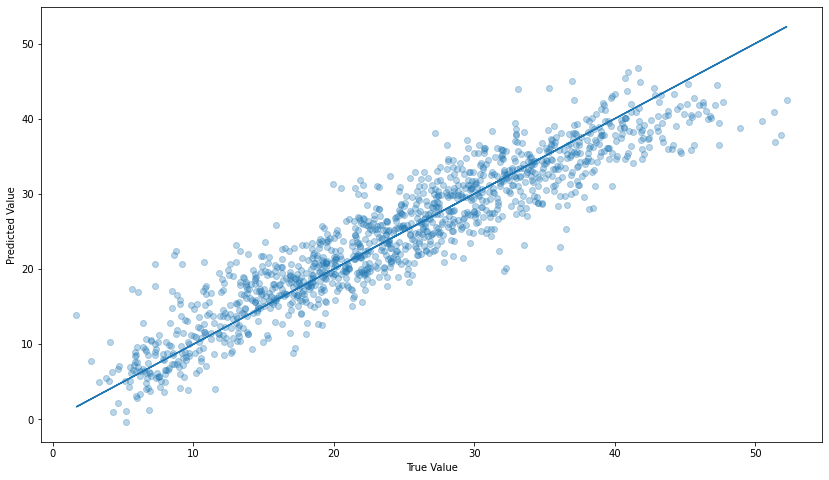

In [70]:
#Plot predicted vs Actual
plt.scatter(y_test, lr_prediction, alpha=0.3)
plt.plot(y_test,y_test) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

* Not a bad model for an inital model
* Let's try other models

Score is 0.8809335010654725
Root Mean Square error: 3.6023161221625526


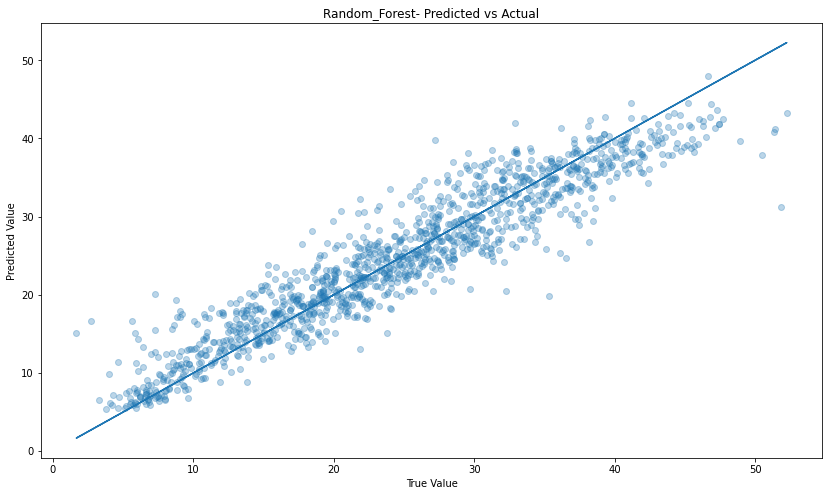

In [71]:
r_forest.fit(X_train,y_train)
r_forest_predictions = r_forest.predict(X_test)

print(f'Score is {r_forest.score(X_test,y_test)}')
print(f'Root Mean Square error: {sqrt(mean_squared_error(y_test,r_forest_predictions))}')

#Plotting predicted vs actual
plt.title('Random_Forest- Predicted vs Actual')
plt.scatter(y_test, r_forest_predictions, alpha=0.3)
plt.plot(y_test,y_test) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

Random Forest looks better, let's try Xgboost regressor

Score is 0.875726072090498
Root Mean Square error: 3.680247637240857


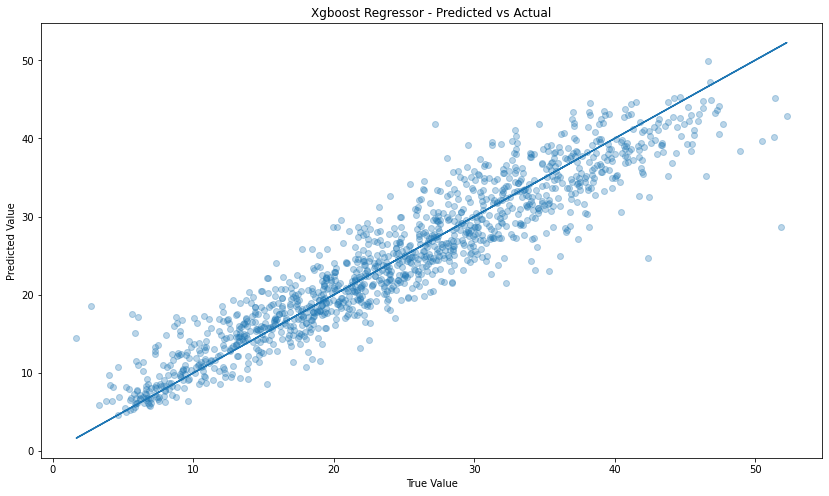

In [72]:
xgb_reg.fit(X_train,y_train)
xgb_reg_predictions = xgb_reg.predict(X_test)

print(f'Score is {xgb_reg.score(X_test,y_test)}')
print(f'Root Mean Square error: {sqrt(mean_squared_error(y_test,xgb_reg_predictions))}')

#Plotting predicted vs actual
plt.title('Xgboost Regressor - Predicted vs Actual')
plt.scatter(y_test, xgb_reg_predictions, alpha=0.3)
plt.plot(y_test,y_test) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

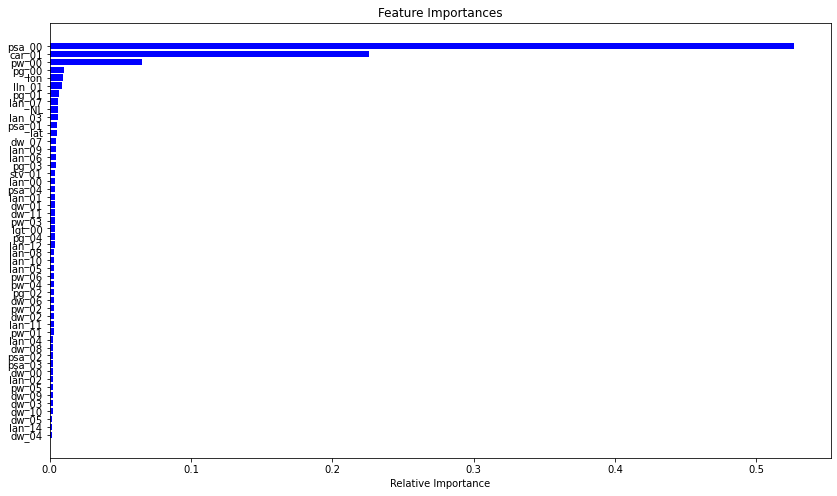

In [73]:
#Feature importance for Random Forest
features = cols_to_use
importances = r_forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [76]:
indices

array([ 4, 33,  5, 10,  3,  9, 45, 22,  0, 15, 14,  8, 24, 41, 31,  2, 42,
        6, 36, 44, 46, 25, 30, 28, 32, 38, 39, 43, 11,  1, 21, 16, 20, 17,
       37, 26, 29,  7, 47, 13, 23, 49, 27, 35, 19, 48, 34, 40, 18, 12],
      dtype=int64)

In [81]:
asc_order_feat = [features[i] for i in indices]

In [83]:
best_40_feat = asc_order_feat[-40:]
best_40_feat

['psa_02',
 'dw_08',
 'lan_04',
 'pw_01',
 'lan_11',
 'dw_02',
 'pw_02',
 'dw_06',
 'pg_02',
 'pw_04',
 'pw_06',
 'lan_05',
 'lan_10',
 'lan_08',
 'lan_12',
 'pg_04',
 'lgt_00',
 'pw_03',
 'dw_11',
 'dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [89]:
X_train_40 = X_train[best_40_feat]
X_test_40 = X_test[best_40_feat]

In [87]:
def model_check(model,x_train,x_test,y_train,y_test,name):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print(f'Score is {model.score(x_test,y_test)}')
    print(f'Root Mean Square error: {sqrt(mean_squared_error(y_test,prediction))}')
    
    #Plotting predicted vs actual
    plt.title(f'{name}- Predicted vs Actual')
    plt.scatter(y_test, prediction, alpha=0.3)
    plt.plot(y_test,y_test) # A straight line - we want to be close to this
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()




Score is 0.8823848016409744
Root Mean Square error: 3.5802945103272905


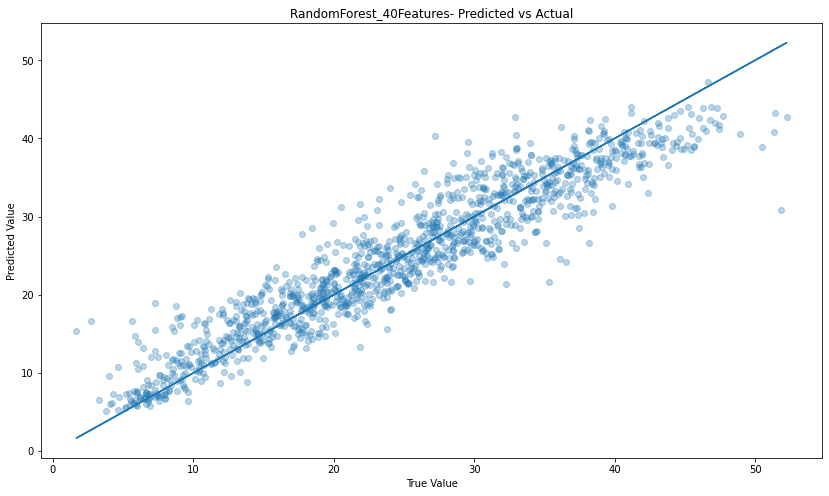

In [90]:
model_check(model=r_forest,x_train=X_train_40, x_test=X_test_40, y_train=y_train, y_test=y_test, name='RandomForest_40Features')

In [91]:
best_30_feat = asc_order_feat[-30:]
print(len(best_30_feat))
best_30_feat

30


['pw_06',
 'lan_05',
 'lan_10',
 'lan_08',
 'lan_12',
 'pg_04',
 'lgt_00',
 'pw_03',
 'dw_11',
 'dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [93]:
X_train_30 = X_train[best_30_feat]
X_test_30 = X_test[best_30_feat]

Score is 0.8813825952519505
Root Mean Square error: 3.5955161086885683


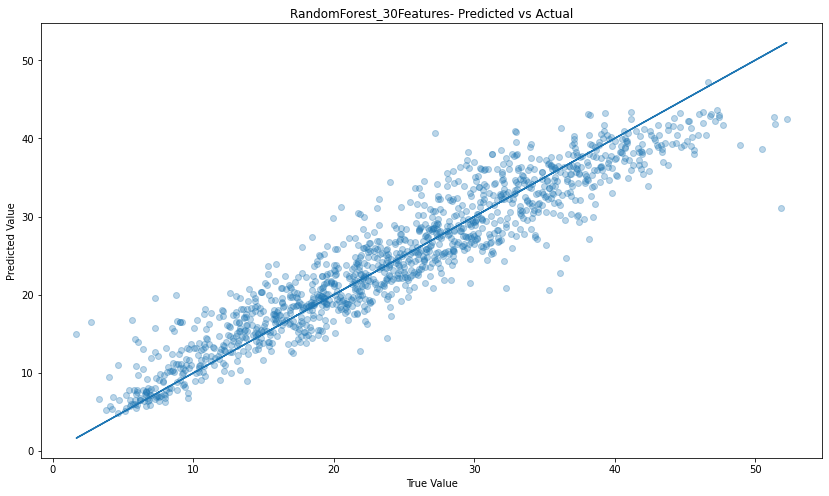

In [94]:
model_check(model=r_forest,x_train=X_train_30, x_test=X_test_30, y_train=y_train, y_test=y_test, name='RandomForest_30Features')

Score is 0.8858823968618132
Root Mean Square error: 3.5266580399421077


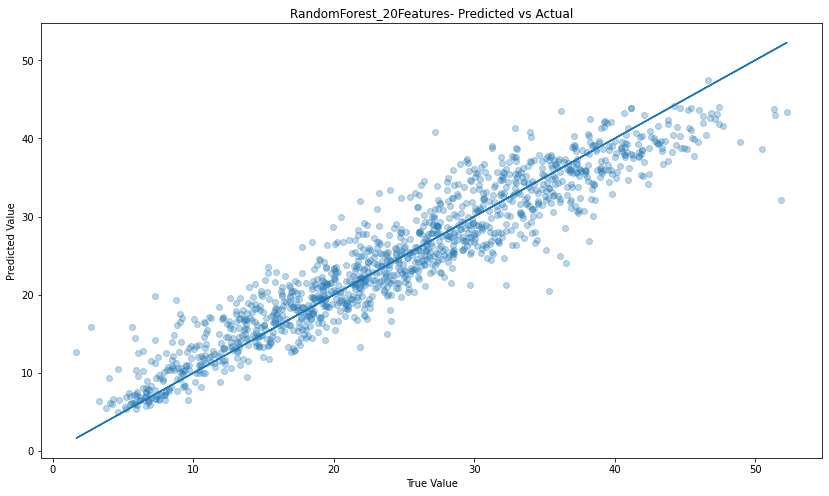

In [95]:
best_20_feat = asc_order_feat[-20:]
#print(len(best_30_feat))
#best_30_feat

X_train_20 = X_train[best_20_feat]
X_test_20 = X_test[best_20_feat]

model_check(model=r_forest,x_train=X_train_20, x_test=X_test_20, y_train=y_train, y_test=y_test, name='RandomForest_20Features')

Score is 0.8835364485496984
Root Mean Square error: 3.5627228945767704


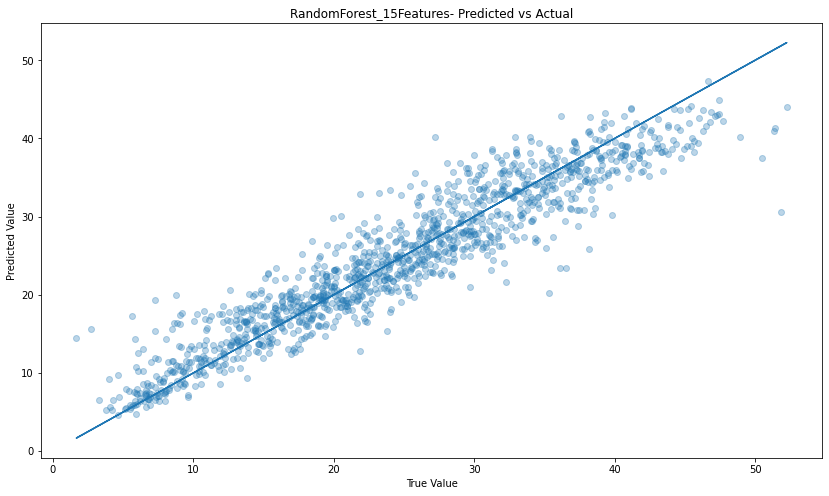

In [96]:
best_15_feat = asc_order_feat[-15:]
#print(len(best_30_feat))
#best_30_feat

X_train_15 = X_train[best_15_feat]
X_test_15 = X_test[best_15_feat]

model_check(model=r_forest,x_train=X_train_15, x_test=X_test_15, y_train=y_train, y_test=y_test, name='RandomForest_15Features')

Score is 0.8750129835708087
Root Mean Square error: 3.690791234365597


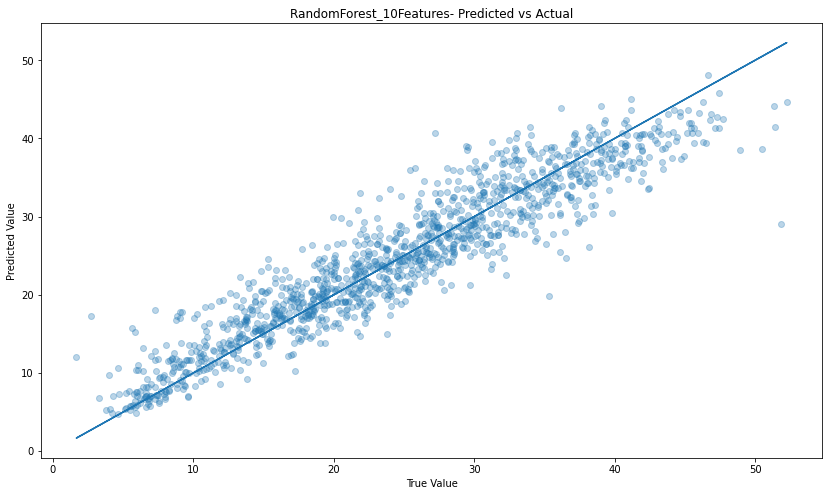

In [97]:
best_10_feat = asc_order_feat[-10:]
#print(len(best_30_feat))
#best_30_feat

X_train_10 = X_train[best_10_feat]
X_test_10 = X_test[best_10_feat]

model_check(model=r_forest,x_train=X_train_10, x_test=X_test_10, y_train=y_train, y_test=y_test, name='RandomForest_10Features')

In [101]:
def rmse(model,x_train,x_test,y_train,y_test,name):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    return f'Rmse for {name} is {sqrt(mean_squared_error(y_test,prediction))}'

In [102]:
rmse(model=r_forest,x_train=X_train_10, x_test=X_test_10, y_train=y_train, y_test=y_test, name='RandomForest_10Features')

'Rmse for RandomForest_10Features is 3.6918662410631686'

In [106]:
no_feat = [17,19,21,23,25,27,29]
for i in no_feat:
    best_feat = asc_order_feat[-i:]
    x_train = X_train[best_feat]
    x_test = X_test[best_feat]
    print(f'For {i} best features')
    print(rmse(model=r_forest,x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, name=f'best{i}_features'))
    print('------------------------------------')
    

For 17 best features
Rmse for best17_features is 3.5822339939681336
------------------------------------
For 19 best features
Rmse for best19_features is 3.5046026114800894
------------------------------------
For 21 best features
Rmse for best21_features is 3.5343643579875277
------------------------------------
For 23 best features
Rmse for best23_features is 3.5588013889835453
------------------------------------
For 25 best features
Rmse for best25_features is 3.590640159121806
------------------------------------
For 27 best features
Rmse for best27_features is 3.5774876815063372
------------------------------------
For 29 best features
Rmse for best29_features is 3.595565407210867
------------------------------------


In [105]:
print(f'So far the 21 best features identified are {asc_order_feat[-21:]}')

So far the 21 best features identified are ['dw_01', 'lan_01', 'psa_04', 'lan_00', 'stv_01', 'pg_03', 'lan_06', 'lan_09', 'dw_07', 'lat', 'psa_01', 'lan_03', 'NL', 'lan_07', 'pg_01', 'lln_01', 'lon', 'pg_00', 'pw_00', 'car_01', 'psa_00']


In [108]:
best_21_feat = asc_order_feat[-21:]
best_21_feat

['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [122]:
#Let's do cross-validation
kf = KFold(n_splits=5, shuffle=False)
for train_index, test_index in kf.split(train[best_21_feat]):
  print(train.iloc[train_index].shape, train.iloc[test_index].shape)

(2257, 63) (565, 63)
(2257, 63) (565, 63)
(2258, 63) (564, 63)
(2258, 63) (564, 63)
(2258, 63) (564, 63)


In [123]:
train[best_21_feat].head()

dw_01    lan_01    psa_04    lan_00    stv_01     pg_03    lan_06  \
0  0.000846  0.012336  0.121705  0.832913  0.716532  0.072996  0.076088   
1  0.001253  0.008445  0.138647  0.879655  0.896359  0.015835  0.032431   
2  0.004517  0.015991  0.114757  0.565546  0.834228  0.167494  0.148083   
3  0.000000  0.006530  0.117663  0.743812  0.912232  0.000956  0.103244   
4  0.000655  0.014352  0.279598  0.422623  0.654025  0.106953  0.147363   

     lan_09     dw_07        lat    psa_01    lan_03        NL    lan_07  \
0  0.000375  0.031466 -29.682270  0.607898  0.050939  0.292039  0.006371   
1  0.001308  0.123547 -29.119311  0.549788  0.011249  3.207775  0.030844   
2  0.000165  0.022632 -29.142276  0.677005  0.111270  0.000000  0.139687   
3  0.000582  0.068909 -29.372052  0.593281  0.086423  2.038778  0.038284   
4  0.000169  0.009150 -29.409381  0.517578  0.121869  0.000000  0.081706   

      pg_01    lln_01        lon     pg_00     pw_00    car_01    psa_00  
0  0.563166  0.881175  24.734743  0.357455  0.742692  0.726273  0.260191  
1  0.278006  0.933097  24.757737  0.698428  0.309294  0.855362  0.290228  
2  0.154225  0.899991  25.094093  0.672452  0.323393  0.727780  0.186435  
3  0.263831  0.970845  24.942867  0.728014  0.677437  0.872125  0.281229  
4  0.129654  0.866448  25.290165  0.753491  0.771106  0.595493  0.196687

In [126]:
# Using this to test a model on 5 different splits
kf = KFold(n_splits=5, shuffle=False)

scores = []
for train_index, test_index in kf.split(train):
    random_forest = RandomForestRegressor()
    random_forest.fit(train[best_21_feat].iloc[train_index], train[target_col].iloc[train_index])
    r_mse = sqrt(mean_squared_error(train[target_col].iloc[test_index], random_forest.predict(train[best_21_feat].iloc[test_index])))
    scores.append(r_mse)
    print(r_mse)
print("Average score in 5-fold CV:", np.mean(scores))


3.7743988719832307
3.476552499631531
4.471300571632836
4.165069890190733
3.9876213042400734
Average score in 5-fold CV: 3.974988627535681


In [129]:
kf = KFold(n_splits=5, shuffle=False)

scores = []
for train_index, test_index in kf.split(train):
    random_forest = RandomForestRegressor(n_estimators=200, max_depth=20)
    random_forest.fit(train[best_21_feat].iloc[train_index], train[target_col].iloc[train_index])
    r_mse = sqrt(mean_squared_error(train[target_col].iloc[test_index], random_forest.predict(train[best_21_feat].iloc[test_index])))
    scores.append(r_mse)
    print(r_mse)
print("Average score in 5-fold CV:", np.mean(scores))

3.678357515878942
3.4473139191292415
4.535949327384534
4.1486917621061865
4.00415914935846
Average score in 5-fold CV: 3.962894334771473


In [131]:
kf = KFold(n_splits=5, shuffle=False)

scores = []
for train_index, test_index in kf.split(train):
    random_forest = RandomForestRegressor(n_estimators=100, max_depth=15)
    random_forest.fit(train[best_21_feat].iloc[train_index], train[target_col].iloc[train_index])
    r_mse = sqrt(mean_squared_error(train[target_col].iloc[test_index], random_forest.predict(train[best_21_feat].iloc[test_index])))
    scores.append(r_mse)
    print(r_mse)
print("Average score in 5-fold CV:", np.mean(scores))

3.788060371690622
3.4589701947514615
4.501980637151656
4.15763444830641
4.0359155647183975
Average score in 5-fold CV: 3.9885122433237092


In [125]:
best_21_feat

['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [124]:
target_col


'target'

In [130]:
# I want to try backward feature elimination with mlxtend
!pip install mlxtend

In [132]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
mlx_rf = RandomForestRegressor(n_estimators=200, max_depth=20)
sfs1 = sfs(mlx_rf, k_features=21, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [133]:
X_train.shape

(1552, 50)

In [135]:
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
sfs1_feat_names = list(sfs1.k_feature_names_)
print(sfs1_feat_names)

In [136]:
cols_to_use

Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_01', 'car_01', 'lln_01', 'lan_00', 'lan_01',
       'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08',
       'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03',
       'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL'],
      dtype='object')

In [137]:
#Trying to make first submission
test.head()

ward  total_households  total_individuals     dw_00     dw_01  \
0  21001001: Ward 1        2504.95194         8745.15151  0.947257  0.000873   
1  21001002: Ward 2        2080.27718         7258.11764  0.844993  0.000481   
2  21001003: Ward 3        1106.62639         5919.13170  0.651380  0.007937   
3  21001004: Ward 4        2175.56096        10280.57452  0.410837  0.002468   
4  21001005: Ward 5        1270.83883         6018.34202  0.942851  0.002638   

      dw_02     dw_03     dw_04     dw_05     dw_06     dw_07     dw_08  \
0  0.002021  0.000000  0.000000  0.030116  0.000452  0.013018  0.003516   
1  0.043629  0.004714  0.012323  0.012300  0.022132  0.022412  0.016969   
2  0.007113  0.000000  0.001977  0.259711  0.006505  0.044153  0.013530   
3  0.011511  0.000485  0.000000  0.449604  0.009256  0.101963  0.001516   
4  0.000821  0.000000  0.000891  0.000787  0.000830  0.027930  0.001617   

      dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01    psa_02  \
0  0.000000  0.000668  0.002078    0.0    0.0  0.246694  0.615326  0.000000   
1  0.006702  0.006492  0.006853    0.0    0.0  0.193484  0.532209  0.000936   
2  0.000000  0.000000  0.007695    0.0    0.0  0.295614  0.499440  0.011465   
3  0.009203  0.000000  0.003157    0.0    0.0  0.265445  0.519198  0.000000   
4  0.017343  0.000000  0.004291    0.0    0.0  0.285008  0.552023  0.000187   

     psa_03    psa_04    stv_00    stv_01    car_00    car_01    lln_00  \
0  0.016724  0.121257  0.155406  0.844594  0.216589  0.783411  0.173569   
1  0.052571  0.220800  0.406129  0.593871  0.498555  0.501445  0.366732   
2  0.078808  0.114673  0.237233  0.762767  0.190044  0.809956  0.090176   
3  0.014156  0.201201  0.343086  0.656914  0.348310  0.651690  0.248744   
4  0.053495  0.109287  0.255566  0.744434  0.182219  0.817781  0.137765   

     lln_01    lan_00    lan_01    lan_02    lan_03    lan_04    lan_05  \
0  0.826431  0.817552  0.022885  0.000643  0.125655  0.000400  0.000125   
1  0.633268  0.434771  0.106254  0.000439  0.289230  0.001222  0.001483   
2  0.909824  0.953113  0.015398  0.000380  0.017653  0.000766  0.000190   
3  0.751256  0.852038  0.020889  0.000985  0.018133  0.000219  0.000552   
4  0.862235  0.965567  0.011856  0.000374  0.010614  0.001126  0.000000   

     lan_06    lan_07    lan_08    lan_09    lan_10  lan_11    lan_12  lan_13  \
0  0.002761  0.006069  0.000384  0.000131  0.000259     0.0  0.004612     0.0   
1  0.002284  0.003142  0.001063  0.000162  0.000000     0.0  0.005779     0.0   
2  0.002090  0.001140  0.003230  0.002241  0.000755     0.0  0.003043     0.0   
3  0.000865  0.005020  0.000766  0.000000  0.000109     0.0  0.001208     0.0   
4  0.001869  0.004672  0.000747  0.000000  0.000747     0.0  0.002429     0.0   

     lan_14     pg_00     pg_01     pg_02     pg_03     pg_04    lgt_00  \
0  0.018525  0.173136  0.736099  0.003712  0.083467  0.003586  0.921001   
1  0.154172  0.471349  0.191902  0.002854  0.324584  0.009311  0.955494   
2  0.000000  0.079592  0.914919  0.001520  0.000549  0.003420  0.975955   
3  0.099216  0.102274  0.832795  0.006965  0.054769  0.003197  0.965817   
4  0.000000  0.033536  0.956602  0.007059  0.000000  0.002803  0.951707   

      pw_00     pw_01     pw_02     pw_03     pw_04  pw_05     pw_06  pw_07  \
0  0.551691  0.427445  0.012457  0.001757  0.000000    0.0  0.006649    0.0   
1  0.759594  0.227192  0.009606  0.000691  0.000000    0.0  0.002916    0.0   
2  0.704033  0.291719  0.001996  0.002253  0.000000    0.0  0.000000    0.0   
3  0.556172  0.439729  0.002060  0.000000  0.000661    0.0  0.001379    0.0   
4  0.444380  0.553173  0.000787  0.000000  0.000000    0.0  0.001660    0.0   

   pw_08 ADM4_PCODE        lat        lon        NL  
0    0.0  ZA2101001 -32.637758  23.848688  0.000000  
1    0.0  ZA2101002 -31.990536  24.555818  0.000000  
2    0.0  ZA2101003 -32.283595  24.563940  8.269556  
3    0.0  ZA2101004 -32.261612  24.542202  8.626625  
4    0.0  ZA2101005 -32

In [138]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20)
rf.fit(train[best_21_feat], train[target_col])


RandomForestRegressor(max_depth=20, n_estimators=200)

In [143]:
sample_sub.head()

ward  target
0  21001001: Ward 1   21.87
1  21001002: Ward 2   65.94
2  21001003: Ward 3   83.65
3  21001004: Ward 4     NaN
4  21001005: Ward 5     NaN

In [144]:
#predictions
sample_sub['target'] = rf.predict(test[best_21_feat])
sample_sub.head()

ward     target
0  21001001: Ward 1  17.814254
1  21001002: Ward 2  14.647589
2  21001003: Ward 3  20.244179
3  21001004: Ward 4  16.369573
4  21001005: Ward 5  21.147002

In [145]:
#First submission
sample_sub.to_csv('Submission1.csv',index=False) #3.582544

In [153]:
#second submission
rf_100_15 = RandomForestRegressor(n_estimators=100, max_depth=15)
rf_100_15.fit(train[best_21_feat], train[target_col])

sample_sub['target'] = rf_100_15.predict(test[best_21_feat])
sample_sub.to_csv('Submission2.csv',index=False)


In [154]:
sample_sub.head()

ward     target
0  21001001: Ward 1  17.451389
1  21001002: Ward 2  15.182587
2  21001003: Ward 3  21.407969
3  21001004: Ward 4  16.660342
4  21001005: Ward 5  21.583238

In [155]:
#third submission
xgb_model = XGBRegressor()
xgb_model.fit(train[best_21_feat], train[target_col])

sample_sub['target'] = xgb_model.predict(test[best_21_feat])
sample_sub.to_csv('Submission3.csv',index=False)

In [8]:
best_feat_21 = ['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']
len(best_feat_21)

21

In [9]:
# i want to add household/individuals
train['house_per_ind'] = train['total_households']/train['total_individuals']
test['house_per_ind'] = test['total_households']/test['total_individuals']

In [23]:
plus_house = best_feat_21.append('house_per_ind')

In [12]:
target_col = 'target'

In [13]:
cols_to_use = train.drop(['dw_12','dw_13','lan_13','pw_07','pw_08','stv_00','car_00','lln_00','ADM4_PCODE'],axis=1).columns
cols_to_use = cols_to_use[4:]
cols_to_use

Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_01', 'car_01', 'lln_01', 'lan_00', 'lan_01',
       'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08',
       'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03',
       'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL', 'house_per_ind'],
      dtype='object')

In [14]:
X = train[cols_to_use]
y = train[target_col]

In [15]:
X.shape

(2822, 51)

In [16]:
from sklearn.model_selection import train_test_split, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11,test_size=0.45)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20)
rf.fit(train[plus_house], train[target_col])

sample_sub['target'] = rf.predict(test[plus_house])
sample_sub.to_csv('Submission4.csv',index=False)

In [24]:
type(plus_house)

NoneType

In [25]:
best_feat_21

['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00',
 'house_per_ind',
 'house_per_ind']

In [27]:
best_feat_21.pop()

'house_per_ind'

In [29]:
len(best_feat_21)

22

In [30]:
plus_house = best_feat_21

In [31]:
type(plus_house)

list

In [32]:
len(plus_house)

22

In [34]:
best_feat_21

['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00',
 'house_per_ind']

In [35]:
best_21_feat = ['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [36]:
train.head()

ward  total_households  total_individuals     target     dw_00  \
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841   
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940   
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545   
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914   
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575   

      dw_01     dw_02     dw_03     dw_04     dw_05     dw_06     dw_07  \
0  0.000846  0.005490  0.000676  0.000000  0.001372  0.005750  0.031466   
1  0.001253  0.004402  0.000000  0.002301  0.001323  0.007575  0.123547   
2  0.004517  0.008891  0.003986  0.007735  0.000956  0.006686  0.022632   
3  0.000000  0.006129  0.000000  0.000813  0.037245  0.005255  0.068909   
4  0.000655  0.001473  0.000598  0.006999  0.000818  0.004985  0.009150   

      dw_08     dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01  \
0  0.008080  0.002823  0.001431  0.008224      0      0  0.260191  0.607898   
1  0.151910  0.001486  0.001253  0.008010      0      0  0.290228  0.549788   
2  0.129902  0.000000  0.000000  0.004150      0      0  0.186435  0.677005   
3  0.218786  0.000000  0.000000  0.002947      0      0  0.281229  0.593281   
4  0.015382  0.008693  0.000000  0.000673      0      0  0.196687  0.517578   

     psa_02    psa_03    psa_04    stv_00    stv_01    car_00    car_01  \
0  0.000188  0.010018  0.121705  0.283468  0.716532  0.273727  0.726273   
1  0.000000  0.021336  0.138647  0.103641  0.896359  0.144638  0.855362   
2  0.000489  0.021315  0.114757  0.165772  0.834228  0.272220  0.727780   
3  0.000579  0.007249  0.117663  0.087768  0.912232  0.127875  0.872125   
4  0.000989  0.005148  0.279598  0.345975  0.654025  0.404507  0.595493   

     lln_00    lln_01    lan_00    lan_01    lan_02    lan_03    lan_04  \
0  0.118825  0.881175  0.832913  0.012336  0.001923  0.050939  0.000000   
1  0.066903  0.933097  0.879655  0.008445  0.000328  0.011249  0.000842   
2  0.100009  0.899991  0.565546  0.015991  0.001566  0.111270  0.004795   
3  0.029155  0.970845  0.743812  0.006530  0.001188  0.086423  0.006735   
4  0.133552  0.866448  0.422623  0.014352  0.000842  0.121869  0.007027   

     lan_05    lan_06    lan_07    lan_08    lan_09    lan_10    lan_11  \
0  0.000564  0.076088  0.006371  0.003663  0.000375  0.000372  0.004943   
1  0.001759  0.032431  0.030844  0.001646  0.001308  0.000994  0.000000   
2  0.002552  0.148083  0.139687  0.003165  0.000165  0.000779  0.001692   
3  0.002308  0.103244  0.038284  0.003080  0.000582  0.000000  0.000197   
4  0.002613  0.147363  0.081706  0.003044  0.000169  0.000643  0.001201   

     lan_12  lan_13    lan_14     pg_00     pg_01     pg_02     pg_03  \
0  0.002719       0  0.006793  0.357455  0.563166  0.004260  0.072996   
1  0.002439       0  0.028061  0.698428  0.278006  0.003695  0.015835   
2  0.002509       0  0.002200  0.672452  0.154225  0.002181  0.167494   
3  0.007442       0  0.000174  0.728014  0.263831  0.001806  0.000956   
4  0.004276       0  0.192272  0.753491  0.129654  0.004523  0.106953   

      pg_04    lgt_00     pw_00     pw_01     pw_02     pw_03     pw_04  \
0  0.002123  0.919424  0.742692  0.214027  0.019968  0.002848  0.007537   
1  0.004036  0.959259  0.309294  0.576844  0.018946  0.014566  0.057127   
2  0.003649  0.826164  0.323393  0.483376  0.083010  0.057560  0.010358   
3  0.005393  0.986151  0.677437  0.314194  0.002689  0.000000  0.000669   
4  0.005380  0.957376  0.771106  0.194743  0.009699  0.004859  0.001290   

      pw_05     pw_06  pw_07  pw_08 ADM4_PCODE        lat        lon  \
0  0.000000  0.012928      0      0  ZA4161001 -29.682270  24.734743   
1  0.019092  0.004131      0      0  ZA4161002 -29.119311  24.757737   
2  0.001421  0.040881      0      0  ZA4161003 -29.142276  25.094093   
3  0.000000  0.005011      0      0  ZA4161004 -29.372052  24.942867   

In [37]:
from xgboost import XGBRegressor

In [39]:
X_train.shape

(1552, 51)

In [40]:
X_test.shape

(1270, 51)

In [41]:
X_train_best = X_train[best_21_feat] #X train with the best 21 features earlier selected(best_21_feat)
X_test_best = X_test[best_21_feat]

In [34]:
def model_check(model,x_train,x_test,y_train,y_test,name):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print(f'Score is {model.score(x_test,y_test)}')
    print(f'Root Mean Square error: {sqrt(mean_squared_error(y_test,prediction))}')
    
    #Plotting predicted vs actual
    plt.title(f'{name}- Predicted vs Actual')
    plt.scatter(y_test, prediction, alpha=0.3)
    plt.plot(y_test,y_test) # A straight line - we want to be close to this
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()


In [43]:
xgbr = XGBRegressor()

In [47]:
from math import sqrt
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

Score is 0.8801709430941782
Root Mean Square error: 3.6138331764819958


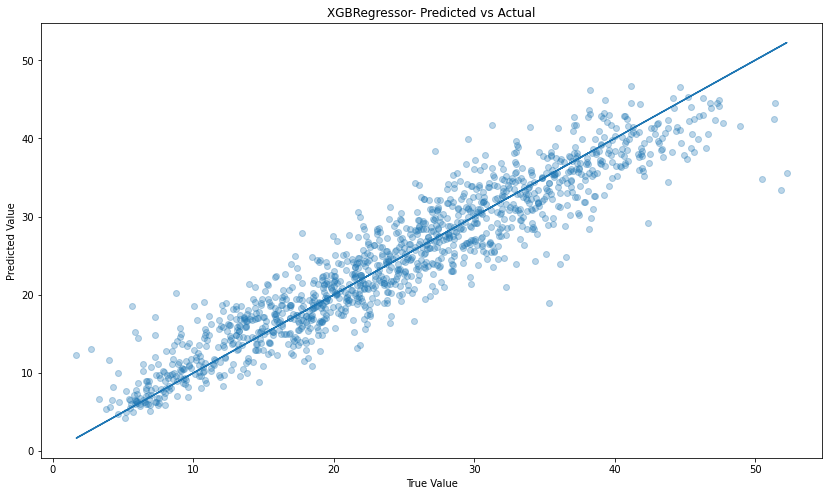

In [48]:
model_check(model=xgbr, x_train=X_train_best, x_test=X_test_best, y_train=y_train, y_test=y_test, name='XGBRegressor')

In [ ]:
#Cross validation
kf = KFold(n_splits=5, shuffle=False)

scores = []
for train_index, test_index in kf.split(train):
    random_forest = RandomForestRegressor()
    random_forest.fit(train[best_21_feat].iloc[train_index], train[target_col].iloc[train_index])
    r_mse = sqrt(mean_squared_error(train[target_col].iloc[test_index], random_forest.predict(train[best_21_feat].iloc[test_index])))
    scores.append(r_mse)
    print(r_mse)
print("Average score in 5-fold CV:", np.mean(scores))

In [52]:
target_col

'target'

In [49]:
import numpy as np
from sklearn.model_selection import KFold

In [35]:
#A cross validation function
def cross_validate(num_splits, train, feat, target, model):
    kf = KFold(n_splits=num_splits, shuffle=False)
    scores=[]
    
    for train_index, test_index in kf.split(train):
        model.fit(train[feat].iloc[train_index], train[target_col].iloc[train_index])
        prediction = model.predict(train[feat].iloc[test_index])
        r_mse = sqrt(mean_squared_error(train[target_col].iloc[test_index], prediction))
        scores.append(r_mse)
        print(r_mse)
    return (f'Average score in {num_splits}-fold CV: {np.mean(scores)}')

In [55]:
cross_validate(num_splits=5, train=train, feat=best_21_feat,target=target_col, model=XGBRegressor())

3.8974530855494134
3.999510227594316
4.613964725309878
4.288443064679241
4.206122115138043


'Average score in 5-fold CV: 4.201098643654179'

In [59]:
xgbr.feature_importances_

array([0.00202692, 0.00282863, 0.004651  , 0.00345813, 0.00485764,
       0.00768293, 0.00546716, 0.00541435, 0.00750464, 0.01124415,
       0.00939137, 0.00689675, 0.01002804, 0.00666559, 0.01405185,
       0.00503234, 0.01242269, 0.01463289, 0.10363272, 0.22032851,
       0.54178166], dtype=float32)

In [65]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=xgb.XGBRegressor(),
                    param_grid={"learning_rate": (0.05, 0.10, 0.15),
                                "max_depth": [ 3, 4, 5, 6, 8],
                                "min_child_weight": [ 1, 3, 5, 7],
                                "gamma":[ 0.0, 0.1, 0.2],
                                "colsample_bytree":[ 0.3, 0.4],},
                    cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)


In [76]:
grid = GridSearchCV(estimator=XGBRegressor(),
                    param_grid={"learning_rate": (0.05, 0.10, 0.15),
                                "max_depth": [ 3, 4, 5, 6, 8]},
                    cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [77]:
grid.fit(X_train_best,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [75]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [69]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

In [70]:
grid.best_score_

-13.16337197215794

In [80]:
new_xgb = XGBRegressor(learning_rate=0.1, max_depth=6)

Score is 0.8801709430941782
Root Mean Square error: 3.6138331764819958


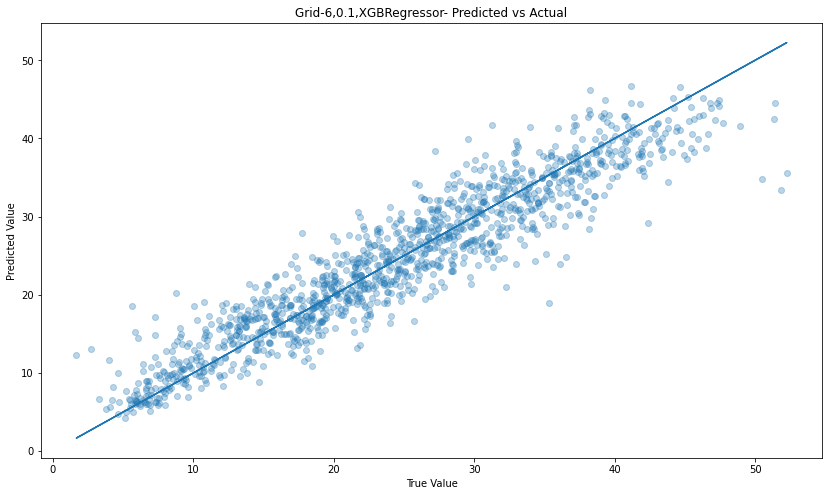

In [81]:
#Model check for my grid search XGboost Regressor
model_check(model=xgbr, x_train=X_train_best, x_test=X_test_best, y_train=y_train, y_test=y_test, name='Grid-6,0.1,XGBRegressor')

In [82]:
grid_2 = GridSearchCV(estimator=XGBRegressor(),
                    param_grid={"learning_rate": (0.05, 0.10, 0.15),
                                "max_depth": [ 3, 4, 5, 6, 8],
                                "min_child_weight": [ 1, 3, 5, 7],
                                "gamma":[ 0.0, 0.1, 0.2],
                                "colsample_bytree":[ 0.3, 0.4],},
                    cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [84]:
grid_2.fit(X_train_best,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [85]:
grid_2.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 7}

In [86]:
grid_2.best_score_

-13.046288176824975

In [90]:
xgb_grid2 = XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7)

In [91]:
xgb_grid2.fit(X_train_best,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Score is 0.8961250837639703
Root Mean Square error: 3.364669204281682


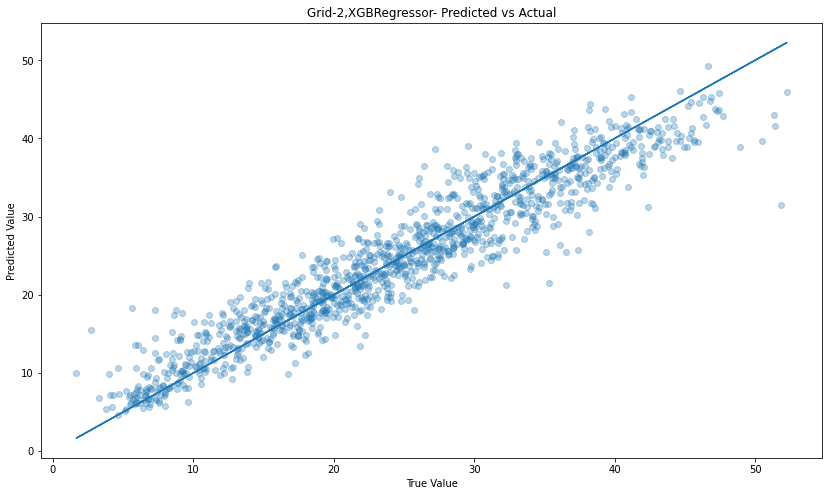

In [93]:
#Model check for my grid search XGboost Regressor
model_check(model=xgb_grid2, x_train=X_train_best, x_test=X_test_best, y_train=y_train, y_test=y_test, name='Grid-2,XGBRegressor')

In [95]:
cross_validate(num_splits=5, train=train, feat=best_21_feat,target=target_col, model=XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7))

3.9784665356883386
3.460496567948392
4.477534895118707
4.1773986496477304
3.782430987179877


'Average score in 5-fold CV: 3.9752655271166093'

In [94]:
#6th submission
#XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7)
xgb_grid2_model = xgb_grid2
xgb_grid2_model.fit(train[best_21_feat], train[target_col])

sample_sub['target'] = xgb_grid2_model.predict(test[best_21_feat])
sample_sub.to_csv('Submission6.csv',index=False)

#LIGHTGBM

In [56]:
!pip install lightgbm

In [57]:
from lightgbm import LGBMRegressor

In [58]:
lgbm_reg = LGBMRegressor()

Score is 0.900423664257291
Root Mean Square error: 3.2943148226425216


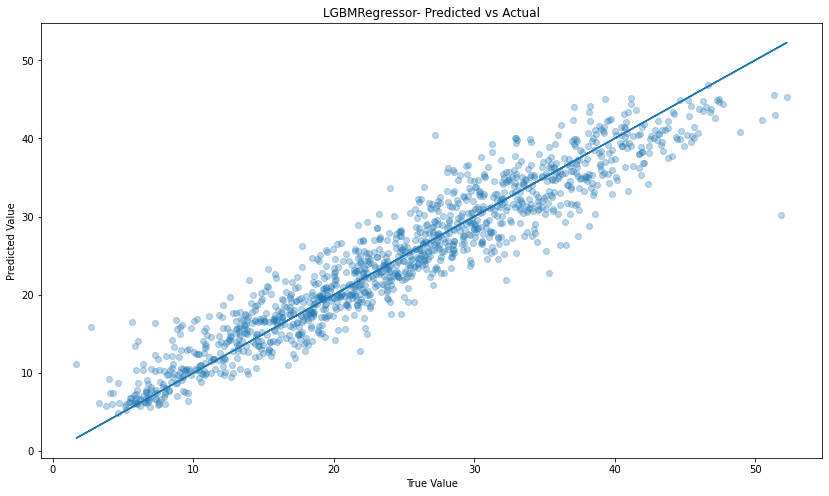

In [60]:
model_check(model=lgbm_reg, x_train=X_train_best, x_test=X_test_best, y_train=y_train, y_test=y_test, name='LGBMRegressor')

In [61]:
cross_validate(num_splits=5, train=train, feat=best_21_feat,target=target_col, model=LGBMRegressor())

3.7555688846106148
3.7114261487451823
4.405298327143031
4.069757688442406
3.7209033183384146


'Average score in 5-fold CV: 3.93259087345593'

In [62]:
#5th submission
lgbm_model = LGBMRegressor()
lgbm_model.fit(train[best_21_feat], train[target_col])

sample_sub['target'] = lgbm_model.predict(test[best_21_feat])
sample_sub.to_csv('Submission5.csv',index=False)

In [96]:
best_21_feat

['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [97]:
var_desc = pd.read_csv('variable_descriptions.csv')
var_desc.head()

Column                                        Description Unnamed: 2  \
0  dw_00  Percentage of dwellings of type: House or bric...        NaN   
1  dw_01  Percentage of dwellings of type: Traditional d...        NaN   
2  dw_02  Percentage of dwellings of type: Flat or apart...        NaN   
3  dw_03  Percentage of dwellings of type: Cluster house...        NaN   
4  dw_04  Percentage of dwellings of type: Townhouse (se...        NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [102]:
var_desc.loc[:'Description']

Column                                        Description  \
0        dw_00  Percentage of dwellings of type: House or bric...   
1        dw_01  Percentage of dwellings of type: Traditional d...   
2        dw_02  Percentage of dwellings of type: Flat or apart...   
3        dw_03  Percentage of dwellings of type: Cluster house...   
4        dw_04  Percentage of dwellings of type: Townhouse (se...   
5        dw_05  Percentage of dwellings of type: Semi-detached...   
6        dw_06  Percentage of dwellings of type: House/flat/ro...   
7        dw_07  Percentage of dwellings of type: Informal dwel...   
8        dw_08  Percentage of dwellings of type: Informal dwel...   
9        dw_09  Percentage of dwellings of type: Room/flatlet ...   
10       dw_10      Percentage of dwellings of type: Caravan/tent   
11       dw_11             Percentage of dwellings of type: Other   
12       dw_12       Percentage of dwellings of type: Unspecified   
13       dw_13    Percentage of dwellings of type: Not applicable   
14      psa_00  Percentage listing present school attendance a...   
15      psa_01  Percentage listing present school attendance a...   
16      psa_02  Percentage listing present school attendance a...   
17      psa_03  Percentage listing present school attendance a...   
18      psa_04  Percentage listing present school attendance a...   
19      stv_00   Percentage of households with Satellite TV:  Yes   
20      stv_01    Percentage of households with Satellite TV:  No   
21      car_00          Percentage of households with a car:  Yes   
22      car_01           Percentage of households with a car:  No   
23      lln_00     Percentage listing landline ownership as:  Yes   
24      lln_01      Percentage listing landline ownership as:  No   
25      lan_00         Percentage listing language as:  Afrikaans   
26      lan_01           Percentage listing language as:  English   
27      lan_02        Percentage listing language as:  IsiNdebele   
28      lan_03          Percentage listing language as:  IsiXhosa   
29      lan_04           Percentage listing language as:  IsiZulu   
30      lan_05            Percentage listing language as:  Sepedi   
31      lan_06           Percentage listing language as:  Sesotho   
32      lan_07          Percentage listing language as:  Setswana   
33      lan_08     Percentage listing language as:  Sign language   
34      lan_09           Percentage listing language as:  SiSwati   
35      lan_10         Percentage listing language as:  Tshivenda   
36      lan_11          Percentage listing language as:  Xitsonga   
37      lan_12             Percentage listing language as:  Other   
38      lan_13       Percentage listing language as:  Unspecified   
39      lan_14    Percentage listing language as:  Not applicable   
40       pg_00     Percentage in population group:  Black African   
41       pg_01          Percentage in population group:  Coloured   
42       pg_02   Percentage in population group:  Indian or Asian   
43       pg_03             Percentage in population group:  White   
44       pg_04             Percentage in population group:  Other   
45      lgt_00          Percentage using electricity for lighting   
46       pw_00  Percentage with piped water access:  Piped (ta...   
47       pw_01  Percentage with piped water access:  Piped (ta...   
48       pw_02  Percentage with piped water access:  Piped (ta...   
49       pw_03  Percentage with piped water access:  Piped (ta...   
50       pw_04  Percentage with piped water access:  Piped (ta...   
51       pw_05  Percentage with piped water access:  Piped (ta...   
52       pw_06  Percentage with piped water access:  No access...   
53       pw_07   Percentage with piped water access:  Unspecified   
54       pw_08  Percentage with piped water access:  Not appli...   
55  ADM4_PCODE  Code for linking row to ward in the wards shap...   
56         lat          Lattitude of the center point of the ward   
57    

In [103]:
var_desc.columns

Index(['Column', 'Description', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [108]:
var_desc.set_index('Column',inplace=True)

In [114]:
pd.set_option('display.width',10000)
#feat_21_desc_df

In [115]:
feat_21_desc_df = pd.DataFrame(var_desc.loc[best_21_feat,'Description'])

In [117]:
var_desc.loc[best_21_feat,'Description']

Column
dw_01     Percentage of dwellings of type: Traditional d...
lan_01             Percentage listing language as:  English
psa_04    Percentage listing present school attendance a...
lan_00           Percentage listing language as:  Afrikaans
stv_01      Percentage of households with Satellite TV:  No
pg_03                Percentage in population group:  White
lan_06             Percentage listing language as:  Sesotho
lan_09             Percentage listing language as:  SiSwati
dw_07     Percentage of dwellings of type: Informal dwel...
lat               Lattitude of the center point of the ward
psa_01    Percentage listing present school attendance a...
lan_03            Percentage listing language as:  IsiXhosa
NL         Nightlights value for the area arounf (lat, lon)
lan_07            Percentage listing language as:  Setswana
pg_01             Percentage in population group:  Coloured
lln_01        Percentage listing landline ownership as:  No
lon               Longitude of th

### More feature engineering
After a careful look at the 21 features i have identified to best predict the target (thus far), i think i should check their distribution against the target variable
and see if there's a trend. I also think i should use car_00(Percentage of household with a car:Yes) instead of car_01;just a hunch don't know why...
Well, let's find out

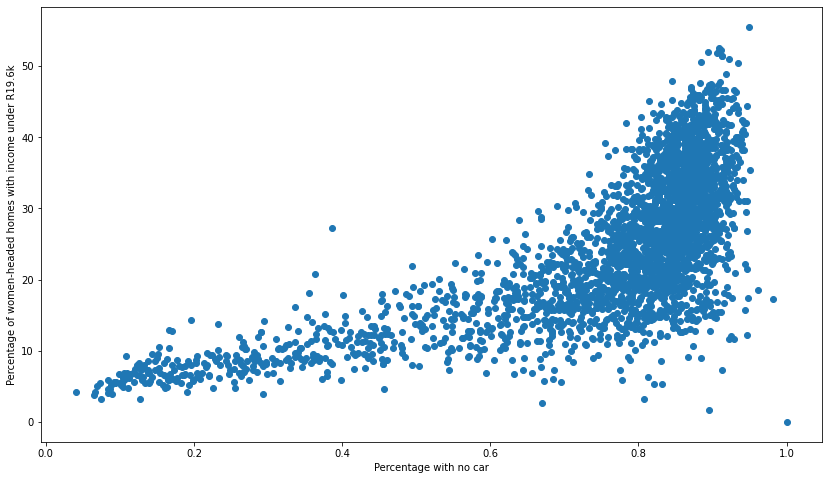

In [118]:
#Plot of car_01 against target
plt.scatter(x=train['car_01'],y=train['target'])
plt.xlabel('Percentage with no car')
plt.ylabel('Percentage of women-headed homes with income under R19.6k')
plt.show()

It appears that wards with higher percentage with no car have more women headed familiese with income under 19.6k

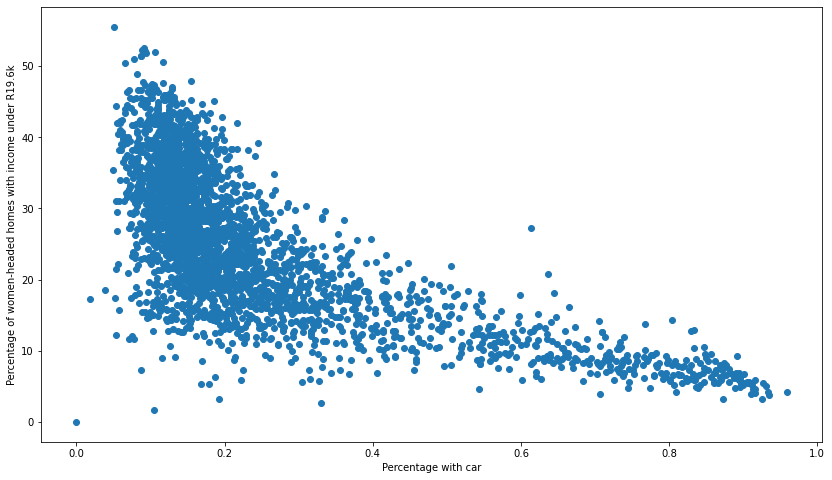

In [119]:
#Plot of car_00 againtst target
plt.scatter(x=train['car_00'],y=train['target'])
plt.xlabel('Percentage with car')
plt.ylabel('Percentage of women-headed homes with income under R19.6k')
plt.show()

Well quite the opposite! Yeah let's just move on to other variables

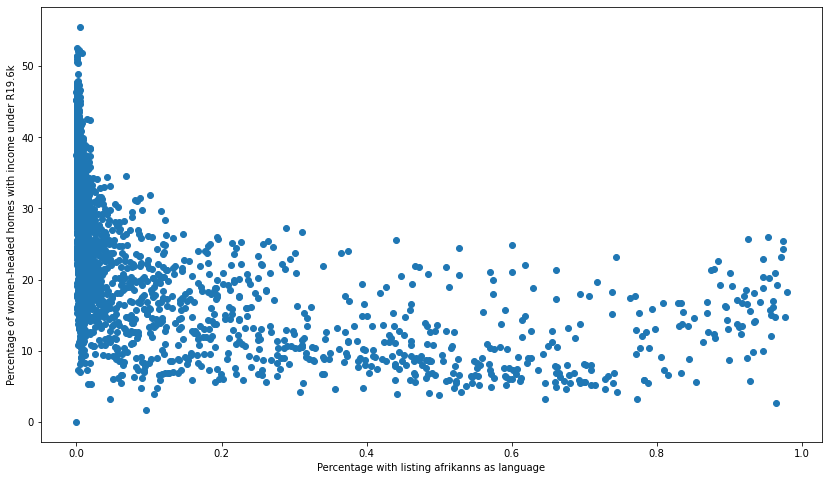

In [120]:
#Plot of lan_00(Afrikanns lang against target)
plt.scatter(x=train['lan_00'],y=train['target'])
plt.xlabel('Percentage with listing afrikanns as language')
plt.ylabel('Percentage of women-headed homes with income under R19.6k')
plt.show()

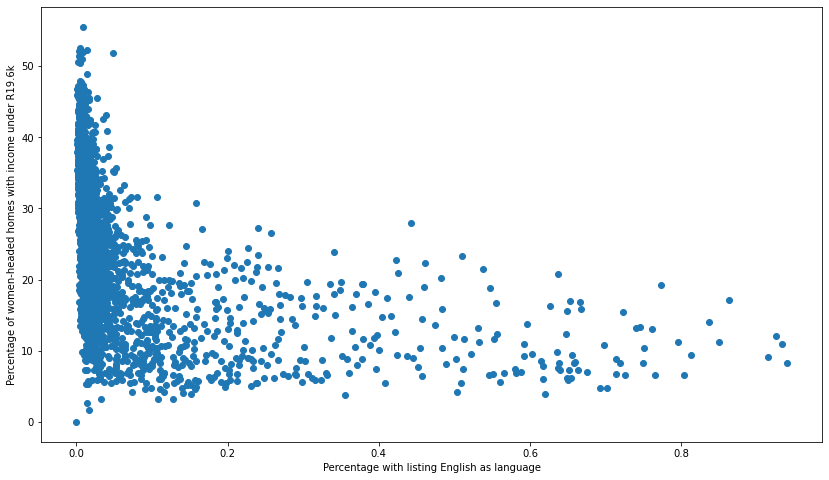

In [121]:
#Plot of lan_01(English lang against target)
plt.scatter(x=train['lan_01'],y=train['target'])
plt.xlabel('Percentage with listing English as language')
plt.ylabel('Percentage of women-headed homes with income under R19.6k')
plt.show()

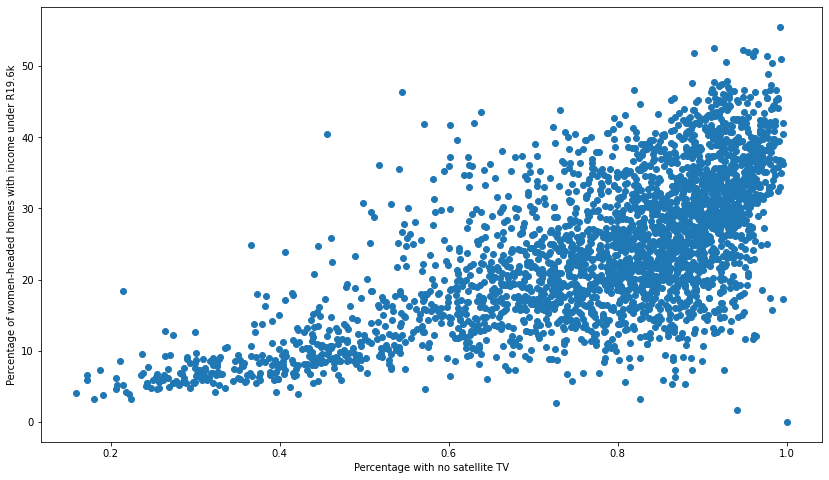

In [123]:
#Plot of stv_01 (No satellite tv)
plt.scatter(x=train['stv_01'],y=train['target'])
plt.xlabel('Percentage with no satellite TV')
plt.ylabel('Percentage of women-headed homes with income under R19.6k')
plt.show()

#### Language listed variables

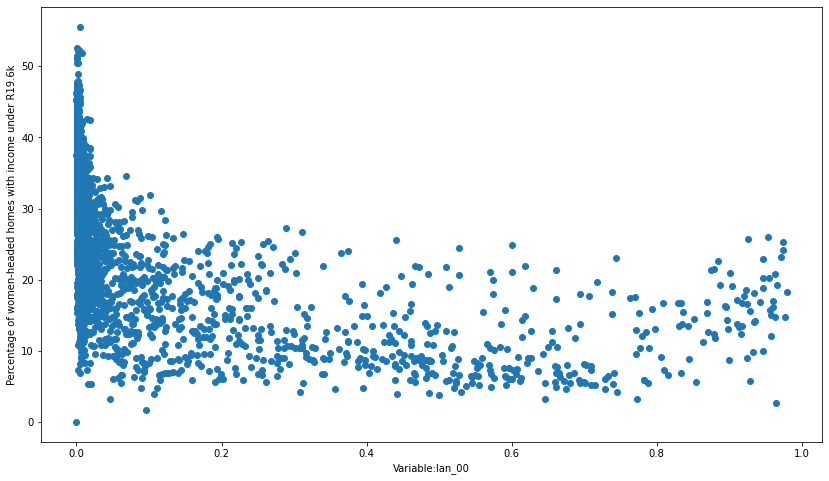

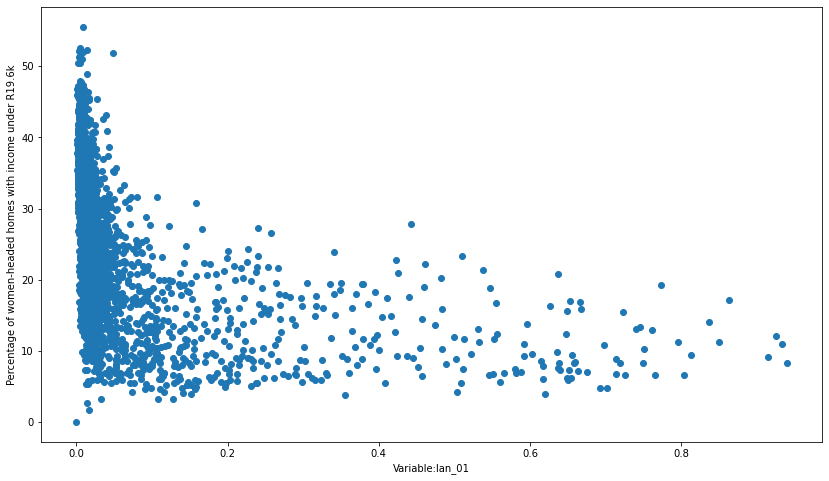

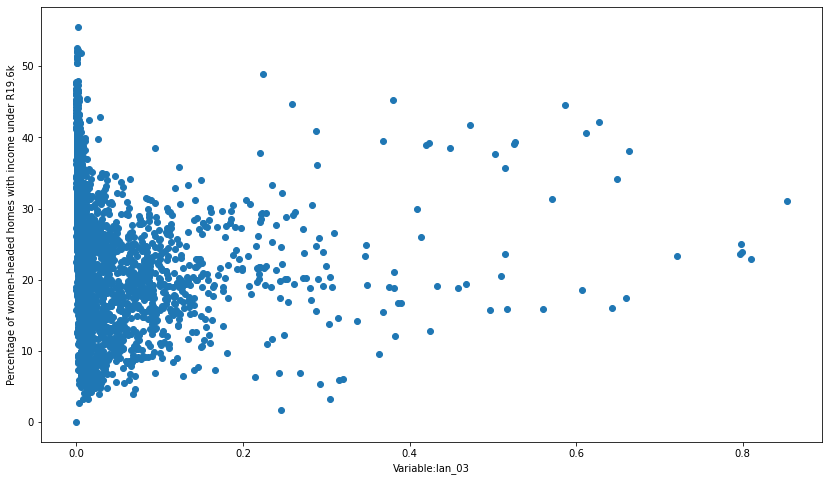

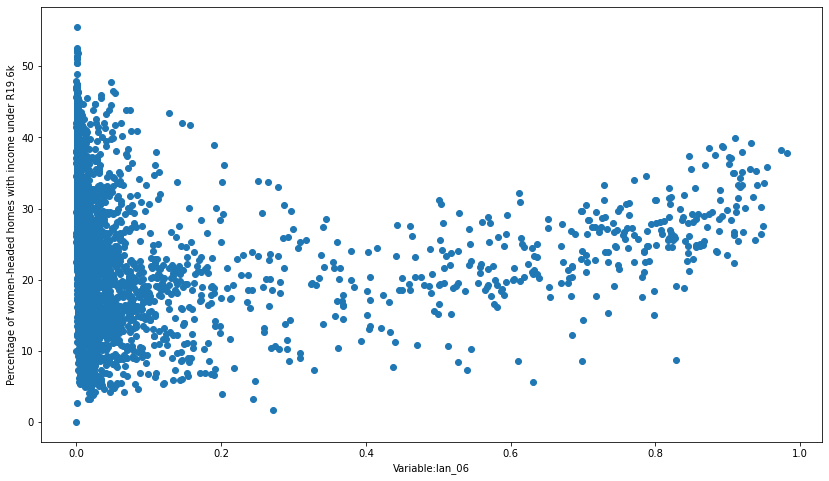

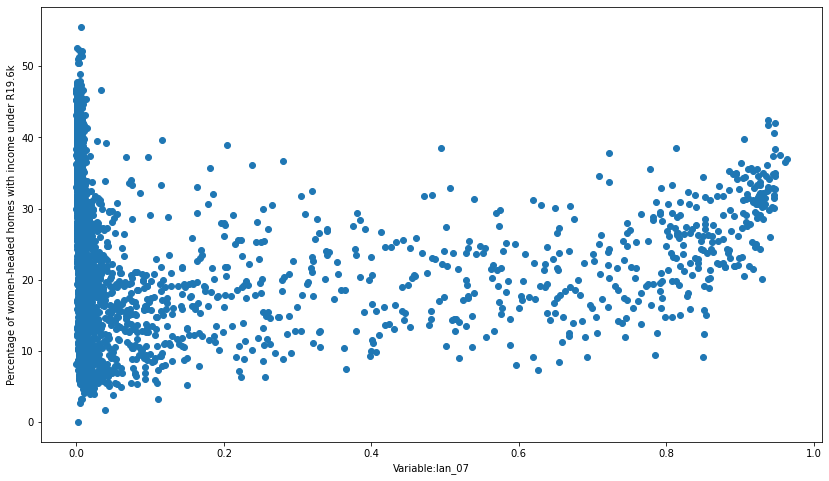

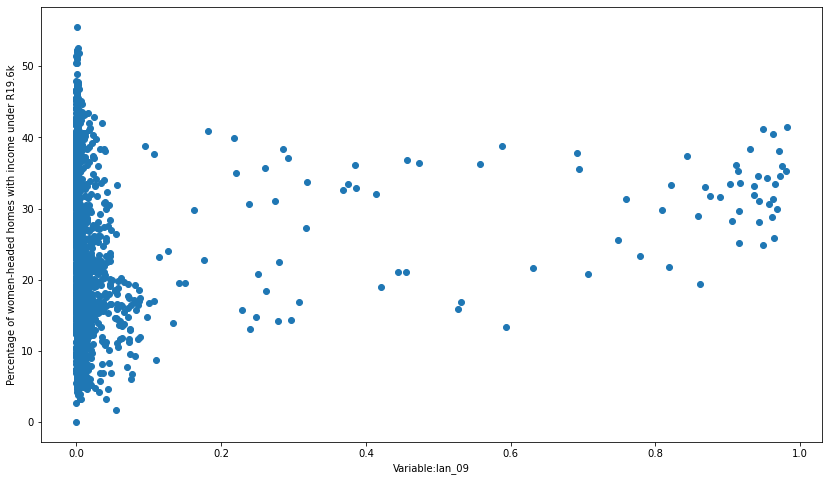

In [124]:
lang_var=['lan_00','lan_01','lan_03','lan_06','lan_07','lan_09']
for var in lang_var:
    plt.scatter(x=train[var],y=train['target'])
    plt.xlabel(f'Variable:{var}')
    plt.ylabel('Percentage of women-headed homes with income under R19.6k')
    plt.show()

#### School attendance variables

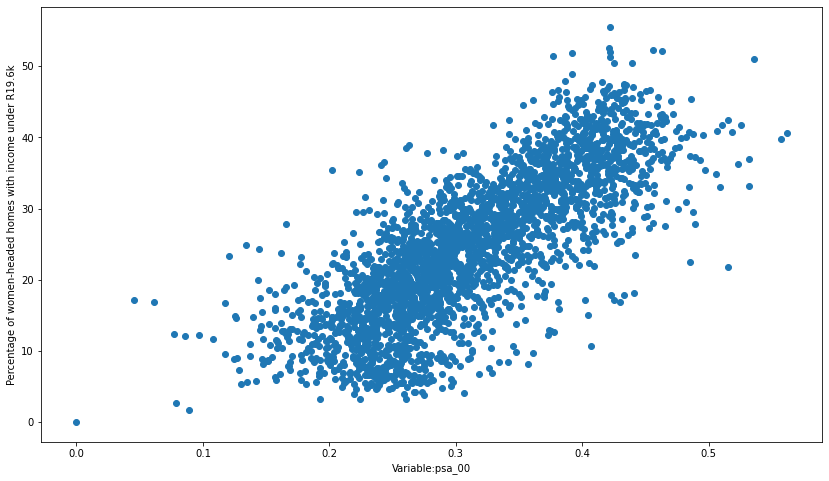

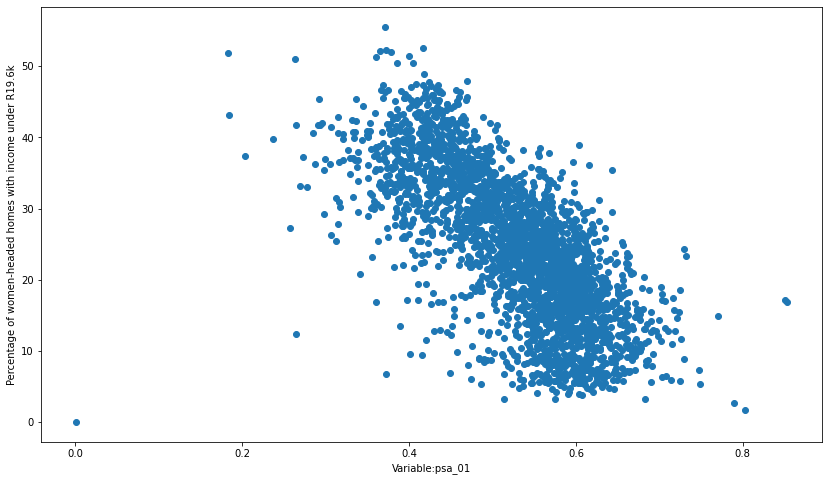

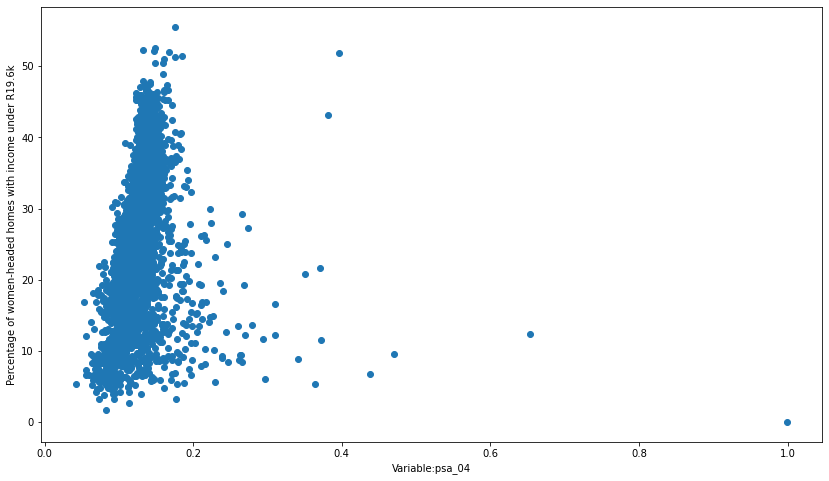

In [125]:
school_att_var = ['psa_00','psa_01','psa_04']
for var in school_att_var:
    plt.scatter(x=train[var],y=train['target'])
    plt.xlabel(f'Variable:{var}')
    plt.ylabel('Percentage of women-headed homes with income under R19.6k')
    plt.show()

#### Population Group Variables

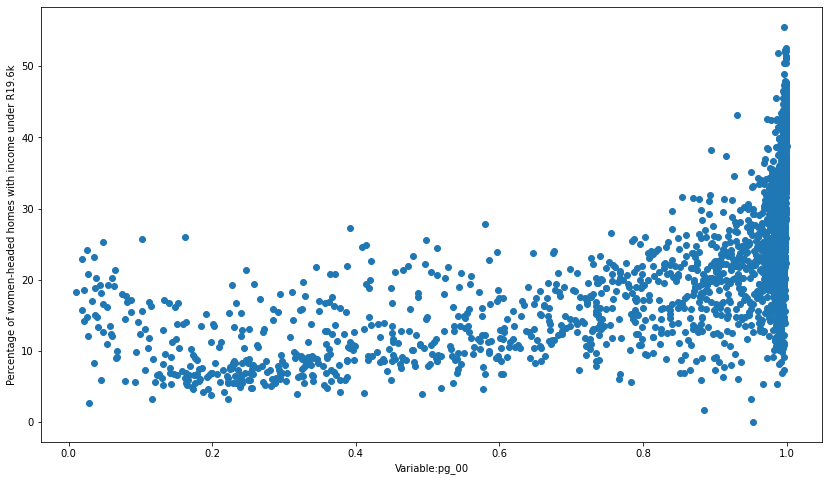

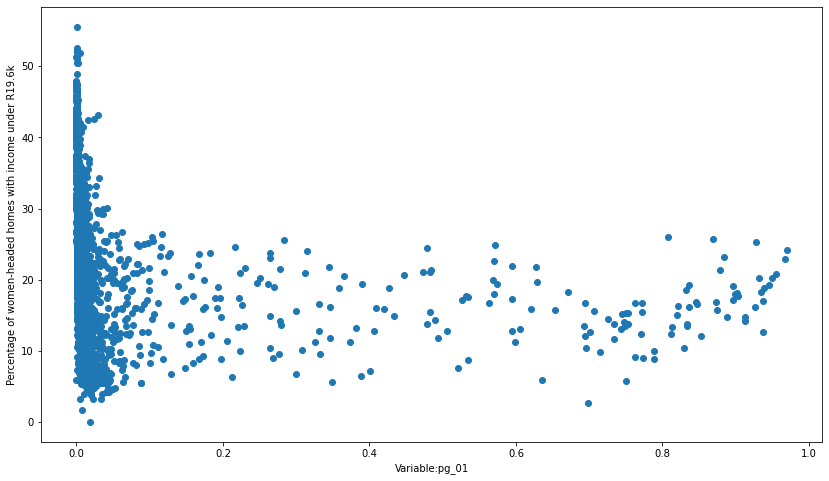

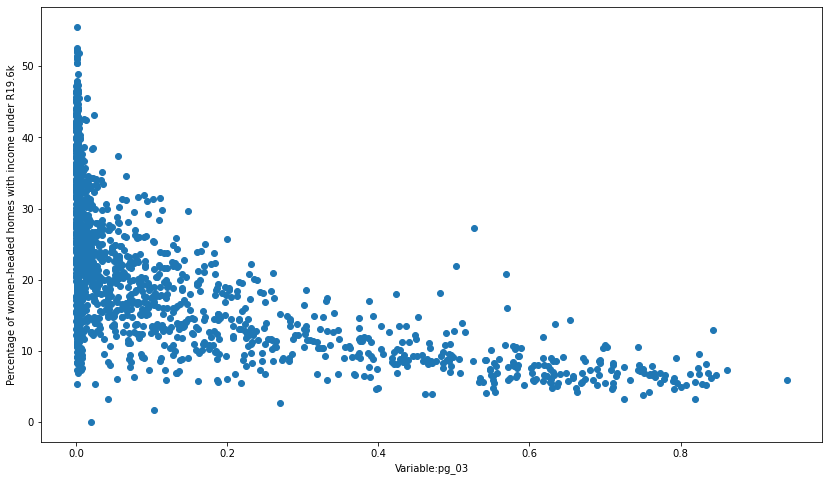

In [126]:
pop_grp_var = ['pg_00','pg_01','pg_03']
for var in pop_grp_var:
    plt.scatter(x=train[var],y=train['target'])
    plt.xlabel(f'Variable:{var}')
    plt.ylabel('Percentage of women-headed homes with income under R19.6k')
    plt.show()

* Polynomial Features
* All the language fatures we have are not linear so let's consider changing to polynomial features.
* 'lan_00','lan_01','lan_03','lan_06','lan_07','lan_09'

In [152]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=3,include_bias=False)

In [128]:
best_21_feat

['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [129]:
train_copy = train.copy()

In [130]:
train_copy.head()

ward  total_households  total_individuals     target     dw_00     dw_01     dw_02     dw_03     dw_04     dw_05     dw_06     dw_07     dw_08     dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01    psa_02    psa_03    psa_04    stv_00    stv_01    car_00    car_01    lln_00    lln_01    lan_00    lan_01    lan_02    lan_03    lan_04    lan_05    lan_06    lan_07    lan_08    lan_09    lan_10    lan_11    lan_12  lan_13    lan_14     pg_00     pg_01     pg_02     pg_03     pg_04    lgt_00     pw_00     pw_01     pw_02     pw_03     pw_04     pw_05     pw_06  pw_07  pw_08 ADM4_PCODE        lat        lon        NL  house_per_ind
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841  0.000846  0.005490  0.000676  0.000000  0.001372  0.005750  0.031466  0.008080  0.002823  0.001431  0.008224      0      0  0.260191  0.607898  0.000188  0.010018  0.121705  0.283468  0.716532  0.273727  0.726273  0.118825  0.881175  0.832913  0.012336  0.001923  0.050939  0.000000  0.000564  0.076088  0.006371  0.003663  0.000375  0.000372  0.004943  0.002719       0  0.006793  0.357455  0.563166  0.004260  0.072996  0.002123  0.919424  0.742692  0.214027  0.019968  0.002848  0.007537  0.000000  0.012928      0      0  ZA4161001 -29.682270  24.734743  0.292039       0.284374
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940  0.001253  0.004402  0.000000  0.002301  0.001323  0.007575  0.123547  0.151910  0.001486  0.001253  0.008010      0      0  0.290228  0.549788  0.000000  0.021336  0.138647  0.103641  0.896359  0.144638  0.855362  0.066903  0.933097  0.879655  0.008445  0.000328  0.011249  0.000842  0.001759  0.032431  0.030844  0.001646  0.001308  0.000994  0.000000  0.002439       0  0.028061  0.698428  0.278006  0.003695  0.015835  0.004036  0.959259  0.309294  0.576844  0.018946  0.014566  0.057127  0.019092  0.004131      0      0  ZA4161002 -29.119311  24.757737  3.207775       0.257892
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545  0.004517  0.008891  0.003986  0.007735  0.000956  0.006686  0.022632  0.129902  0.000000  0.000000  0.004150      0      0  0.186435  0.677005  0.000489  0.021315  0.114757  0.165772  0.834228  0.272220  0.727780  0.100009  0.899991  0.565546  0.015991  0.001566  0.111270  0.004795  0.002552  0.148083  0.139687  0.003165  0.000165  0.000779  0.001692  0.002509       0  0.002200  0.672452  0.154225  0.002181  0.167494  0.003649  0.826164  0.323393  0.483376  0.083010  0.057560  0.010358  0.001421  0.040881      0      0  ZA4161003 -29.142276  25.094093  0.000000       0.330477
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914  0.000000  0.006129  0.000000  0.000813  0.037245  0.005255  0.068909  0.218786  0.000000  0.000000  0.002947      0      0  0.281229  0.593281  0.000579  0.007249  0.117663  0.087768  0.912232  0.127875  0.872125  0.029155  0.970845  0.743812  0.006530  0.001188  0.086423  0.006735  0.002308  0.103244  0.038284  0.003080  0.000582  0.000000  0.000197  0.007442       0  0.000174  0.728014  0.263831  0.001806  0.000956  0.005393  0.986151  0.677437  0.314194  0.002689  0.000000  0.000669  0.000000  0.005011      0      0  ZA4161004 -29.372052  24.942867  2.038778       0.303564
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575  0.000655  0.001473  0.000598  0.006999  0.000818  0.004985  0.009150  0.015382  0.008693  0.000000  0.000673      0      0  0.196687  0.517578  0.000989  0.005148  0.279598  0.345975  0.654025  0.404507  0.595493  0.133552  0.866448  0.422623  0.014352  0.000842  0.121869  0.007027  0.002613  0.147363  0.081706  0.003044  0.000169  0.000643  0.001201  0.004276       0  0.192272  0.753491  0.129654  0.004523  0.106953  0.005380  0.957376  0.771106  0.194743  0.009699  0.004859  0.001290  0.000673  0.017629      0      0  ZA4161005 -29.409381  25.290165  0.000000       0.259945

In [131]:
feat_whout_lang = ['dw_01', 'dw_07', 'stv_01', 'pg_00', 'pg_01', 'pg_03', 'lat', 'lon', 'lln_01', 'pw_00', 'car_01', 'psa_00', 'psa_01', 'psa_04']

In [153]:
train_trans = poly_feat.fit_transform(train_copy[lang_var])

In [154]:
train_trans = pd.DataFrame(train_trans)
train_trans.head()

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25            26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46            47            48            49        50            51            52        53        54        55            56        57        58            59            60            61            62        63        64        65            66        67        68            69        70            71            72        73        74        75        76            77            78            79            80            81            82
0  0.832913  0.012336  0.050939  0.076088  0.006371  0.000375  0.693743  0.010275  0.042428  0.063375  0.005307  0.000312  0.000152  0.000628  0.000939  0.000079  0.000005  0.002595  0.003876  0.000325  0.000019  0.005789  0.000485  0.000029  0.000041  0.000002  1.407514e-07  0.577828  0.008558  0.035339  0.052786  0.004420  0.000260  0.000127  0.000523  0.000782  0.000065  0.000004  0.002161  0.003228  0.000270  0.000016  0.004822  0.000404  0.000024  0.000034  0.000002  1.172336e-07  1.877465e-06  7.752342e-06  0.000012  9.695956e-07  5.709626e-08  0.000032  0.000048  0.000004  2.357592e-07  0.000071  0.000006  3.521543e-07  5.007366e-07  2.948671e-08  1.736374e-09  0.000132  0.000197  0.000017  9.734859e-07  0.000295  0.000025  1.454099e-06  0.000002  1.217552e-07  7.169756e-09  0.000441  0.000037  0.000002  0.000003  1.818661e-07  1.070949e-08  2.585997e-07  1.522808e-08  8.967308e-10  5.280549e-11
1  0.879655  0.008445  0.011249  0.032431  0.030844  0.001308  0.773793  0.007429  0.009896  0.028528  0.027132  0.001150  0.000071  0.000095  0.000274  0.000260  0.000011  0.000127  0.000365  0.000347  0.000015  0.001052  0.001000  0.000042  0.000951  0.000040  1.709644e-06  0.680671  0.006535  0.008705  0.025095  0.023867  0.001012  0.000063  0.000084  0.000241  0.000229  0.000010  0.000111  0.000321  0.000305  0.000013  0.000925  0.000880  0.000037  0.000837  0.000035  1.503897e-06  6.023144e-07  8.023090e-07  0.000002  2.199824e-06  9.325418e-08  0.000001  0.000003  0.000003  1.242186e-07  0.000009  0.000008  3.581113e-07  8.034387e-06  3.405909e-07  1.443821e-08  0.000001  0.000004  0.000004  1.654646e-07  0.000012  0.000011  4.770199e-07  0.000011  4.536820e-07  1.923233e-08  0.000034  0.000032  0.000001  0.000031  1.307925e-06  5.544510e-08  2.934388e-05  1.243935e-06  5.273248e-08  2.235417e-09
2  0.565546  0.015991  0.111270  0.148083  0.139687  0.000165  0.319842  0.009044  0.062928  0.083748  0.079000  0.000093  0.000256  0.001779  0.002368  0.002234  0.000003  0.012381  0.016477  0.015543  0.000018  0.021929  0.020685  0.000024  0.019513  0.000023  2.706584e-08  0.180886  0.005115  0.035589  0.047363  0.044678  0.000053  0.000145  0.001006  0.001339  0.001263  0.000001  0.007002  0.009319  0.008790  0.000010  0.012402  0.011699  0.000014  0.011035  0.000013  1.530698e-08  4.089250e-06  2.845375e-05  0.000038  3.572066e-05  4.207007e-08  0.000198  0.000263  0.000249  2.927313e-07  0.000351  0.000331  3.895814e-07  3.120293e-04  3.674930e-07  4.328155e-10  0.001378  0.001833  0.001729  2.036878e-06  0.002440  0.002302  2.710779e-06  0.002171  2.557084e-06  3.011610e-09  0.003247  0.003063  0.000004  0.002889  3.403095e-06  4.008001e-09  2.725658e-03  3.210147e-06  3.780756e-09  4.452791e-12
3  0.743812  0.006530  0.086423  0.103244  0.038284  0.000582  0.553256  0.004857  0.064283  0.076794  0.028476  0.000433  0.000043  0.000564  0.000674  0.000250  0.000004  0.007469  0.008923  0.003309  0.000050  0.010659  0.003953  0.000060  0.001466  0.000022  3.384595e-07  0.411518  0.003613  0.047814  0.057120  0.021181  0.000322  0.000032 

In [156]:
train_trans.describe()

0            1            2            3            4            5            6            7            8            9            10           11           12           13           14           15           16           17           18           19            20           21           22           23           24           25            26            27            28            29            30            31            32            33            34            35            36            37            38            39            40            41            42            43            44            45            46            47            48            49            50            51            52            53            54            55            56            57            58            59            60            61            62            63            64            65            66            67            68            69            70            71            72            73            74            75            76            77            78            79            80            81            82
count  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2.822000e+03  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03  2.822000e+03
mean      0.097603     0.058684     0.039983     0.108053     0.130673     0.024319     0.051126     0.009067     0.003822     0.007410     0.008777     0.000706     0.018730     0.002317     0.003270     0.004126     0.000534     0.008561     0.007502     0.005146  2.923039e-04     0.060127     0.006892     0.000638     0.084974     0.000435  1.435974e-02  3.519530e-02  3.773047e-03  1.522498e-03  2.095515e-03  3.084277e-03  1.773522e-04  2.229051e-03  2.702833e-04  4.455041e-04  4.775965e-04  5.470976e-05  6.970198e-04  4.550571e-04  3.226372e-04  1.800254e-05  2.884690e-03  3.909677e-04  3.531583e-05  3.562372e-03  2.153937e-05  1.587635e-04  1.023830e-02  5.554608e-04  4.194826e-04  4.256239e-04  5.860311e-05  3.485689e-04  2.089683e-04  1.604795e-04  1.276389e-05  1.218835e-03  2.114028e-04  2.094384e-05  2.123445e-03  1.575337e-05  1.799083e-04  3.538648e-03  1.215241e-03  6.431217e-04  3.882768e-05  3.742391e-03  6.371435e-04  3.431731e-05  2.535045e-03  2.374027e-05  2.640392e-05  4.375586e-02  1.797924e-03  1.152441e-04  2.642402e-03  3.090527e-05  9.763865e-05  6.590615e-02  1.455830e-04  2.792844e-05  1.201572e-02
std       0.203996     0.123658     0.083454     0.220157     0.260619     0.117359     0.155890     0.025050     0.014735     0.021353     0.027256     0.003865     0.079092     0.006405     0.006885     0.008561     0.002294     0.043505     0.021582     0.014403  9.048742e-04     0.174901     0.017648     0.002866     0.216064     0.001021  1.021254e-01  1.309709e-01  1.254865e-02  7.872186e-03  7.881573e-03  1.251080e-02  8.776541e-04  8.810065e-03  8.684816e-04  1.421851e-03  1.542243e-03  2.446502e-04  5.611912e-03  1.766877e-03  1.272609e-03  8.388076e-05  1.077099e-02  1.2

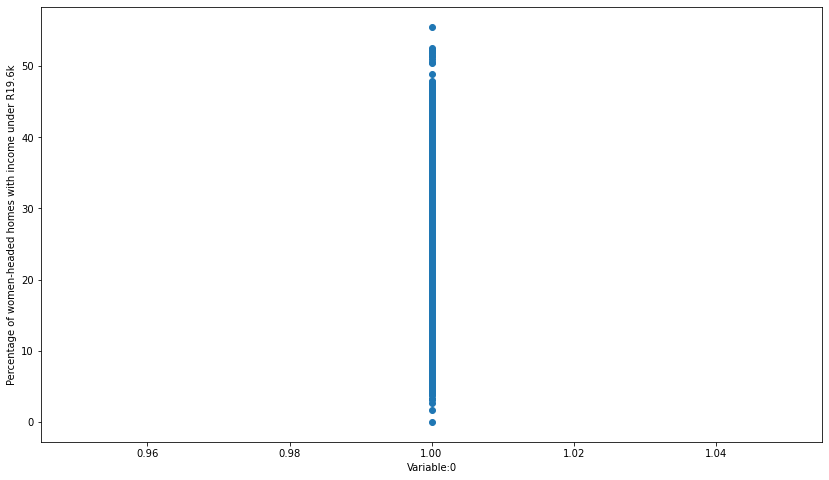

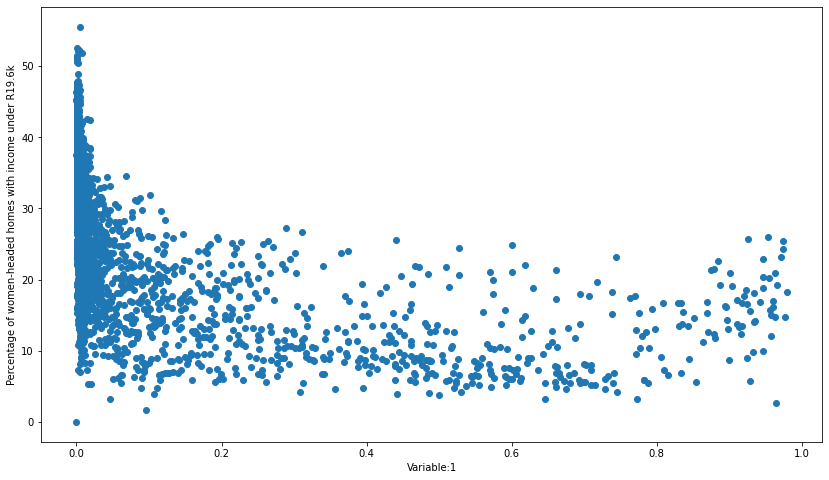

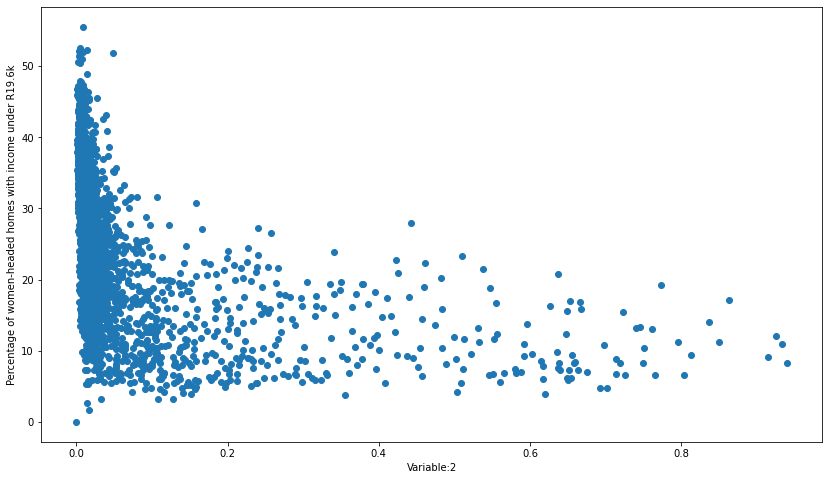

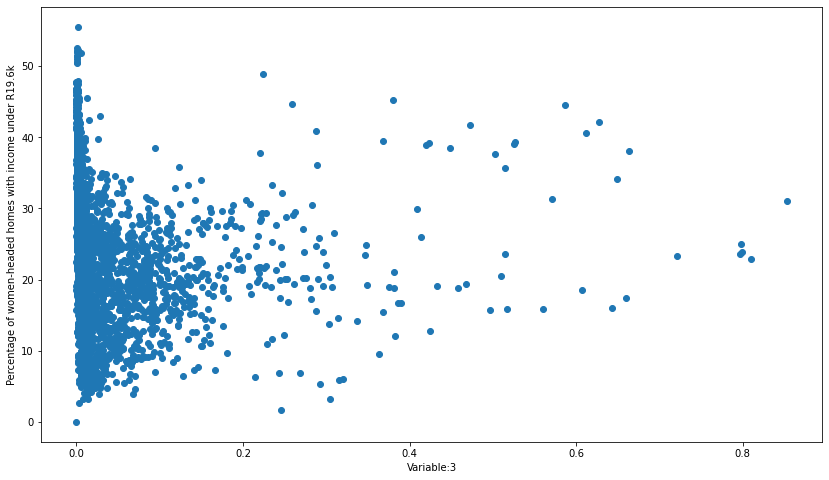

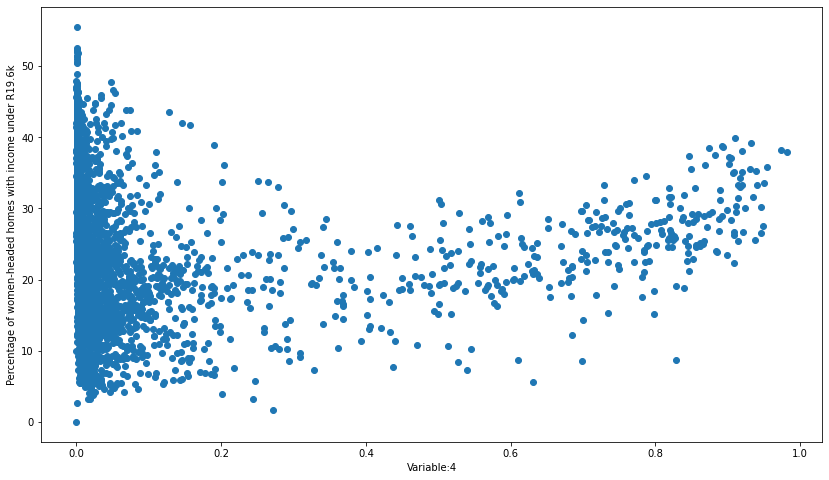

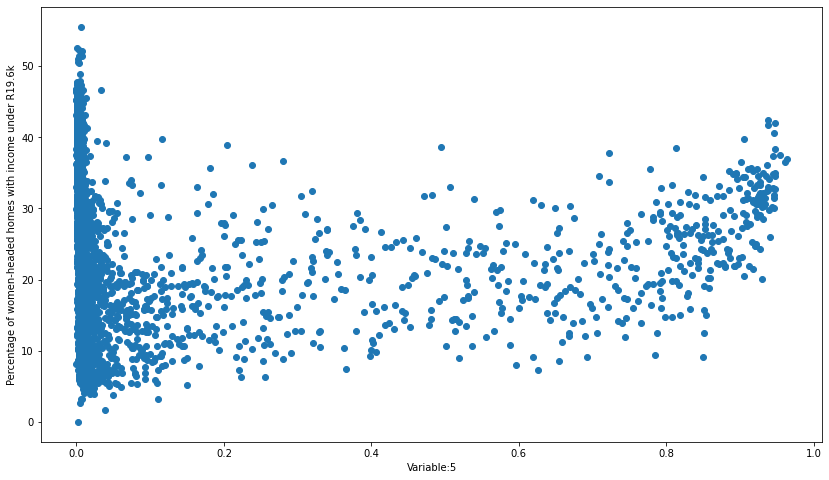

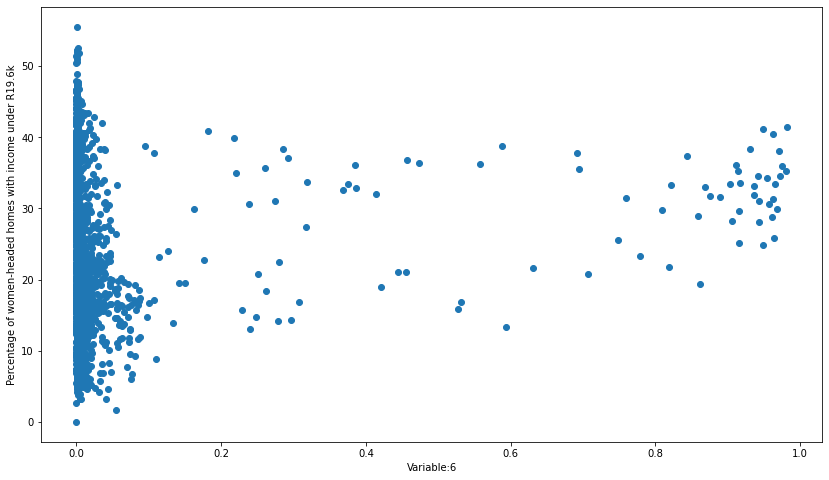

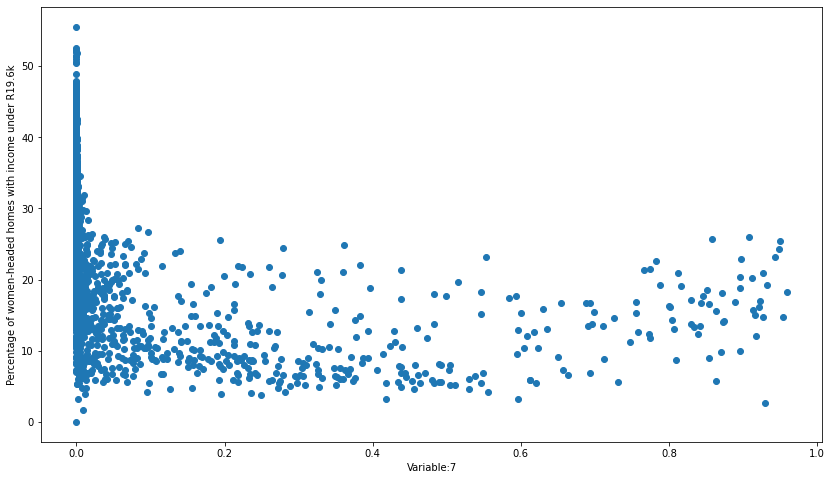

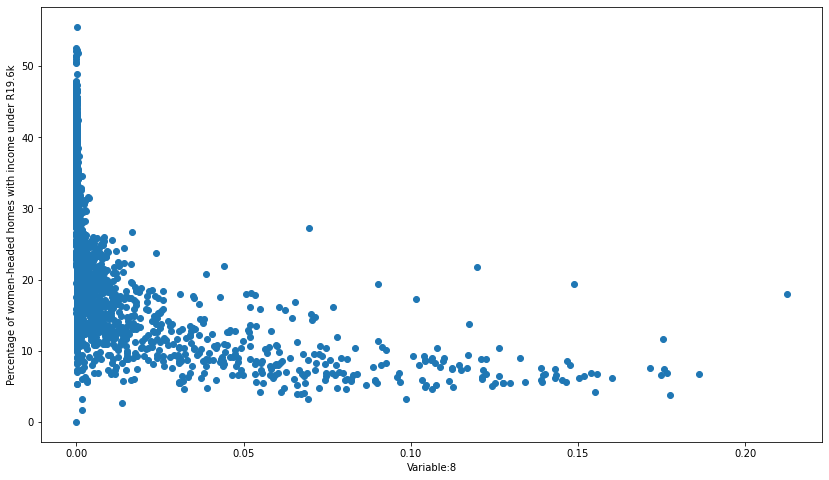

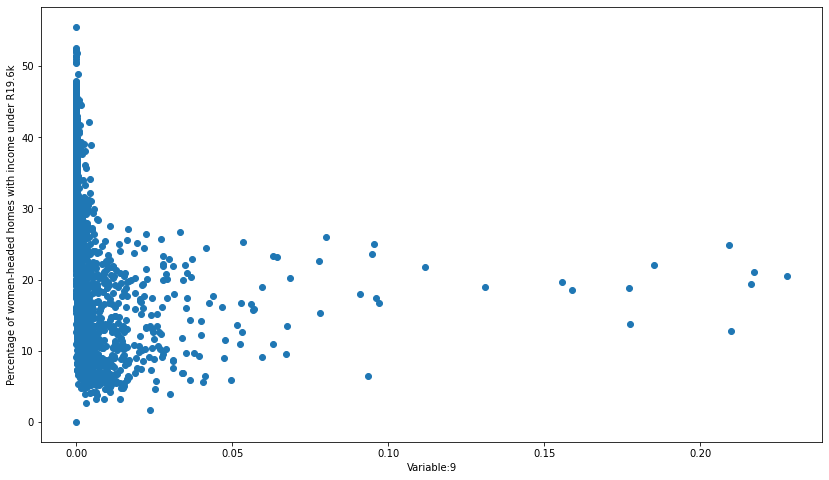

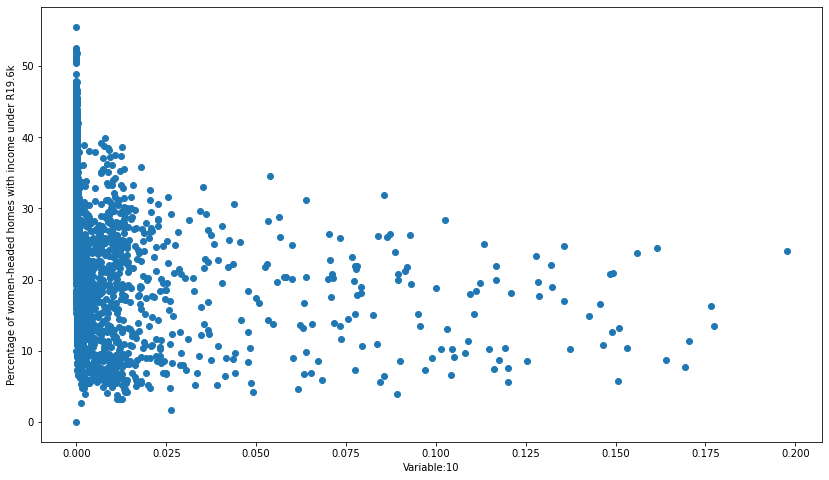

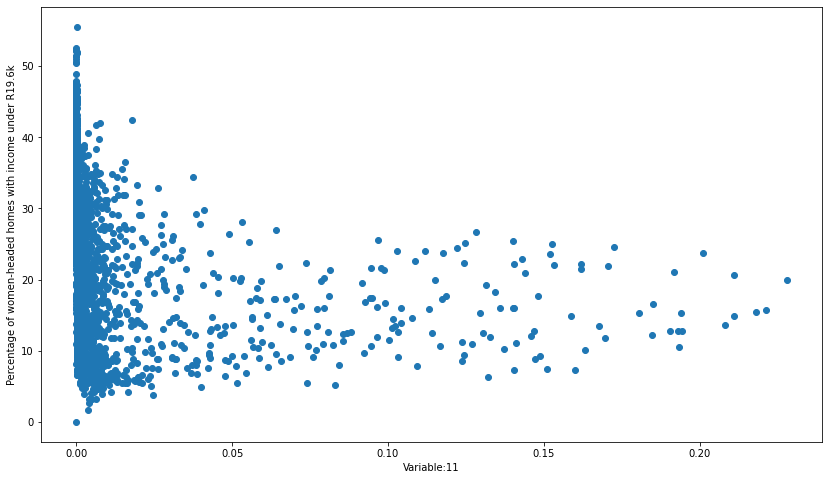

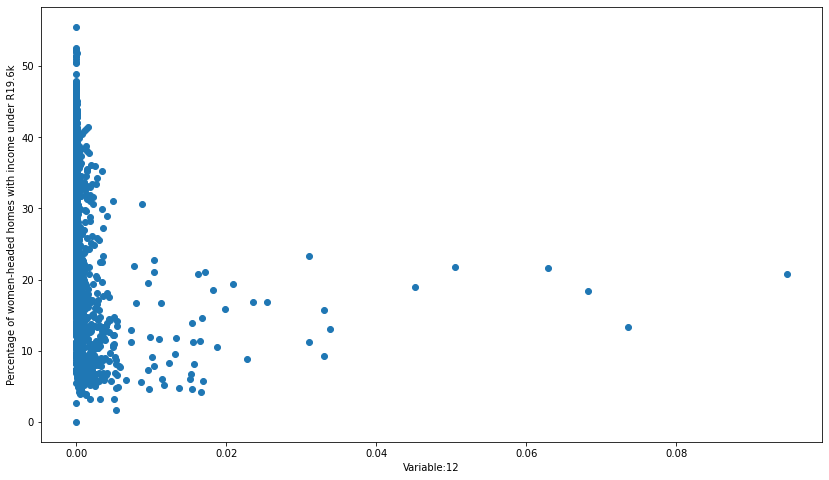

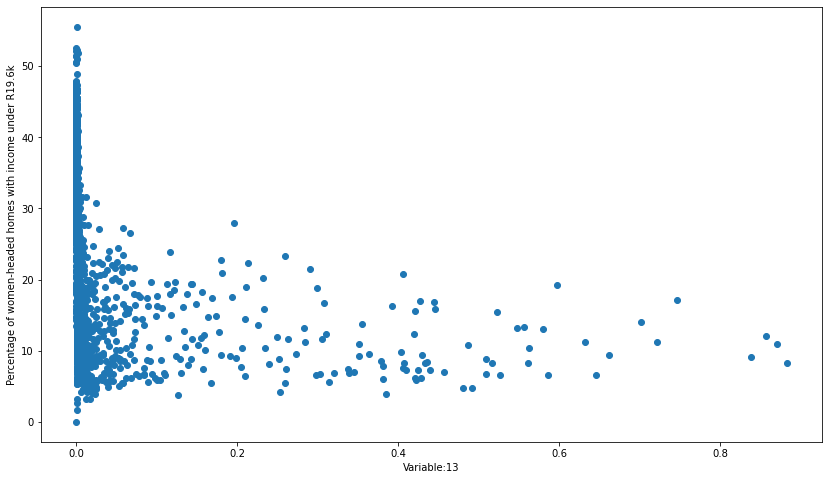

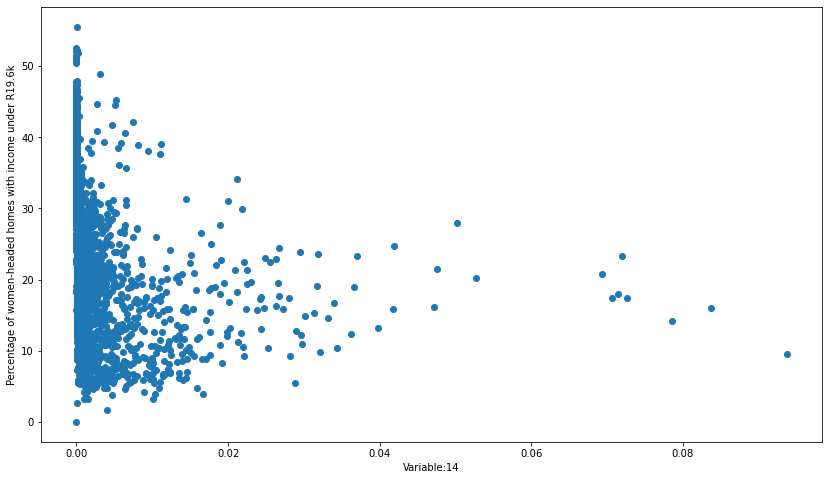

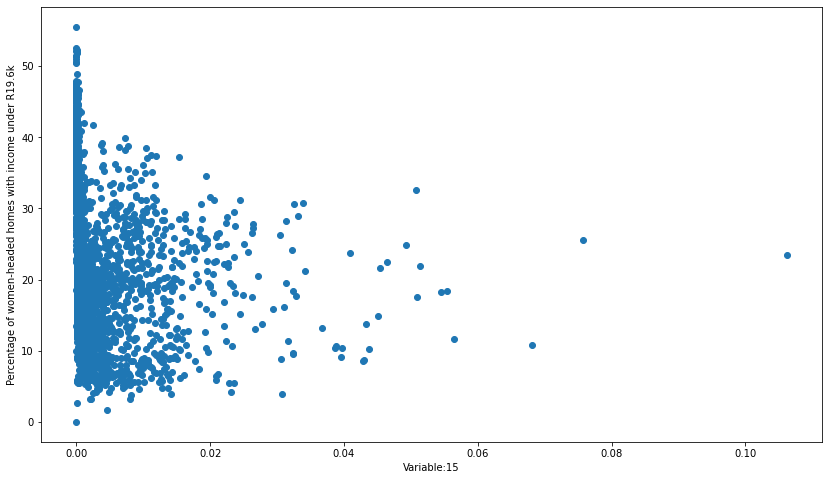

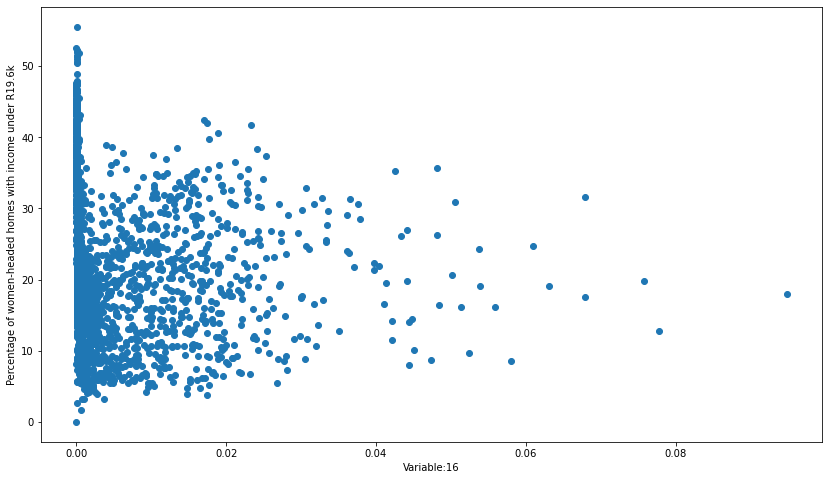

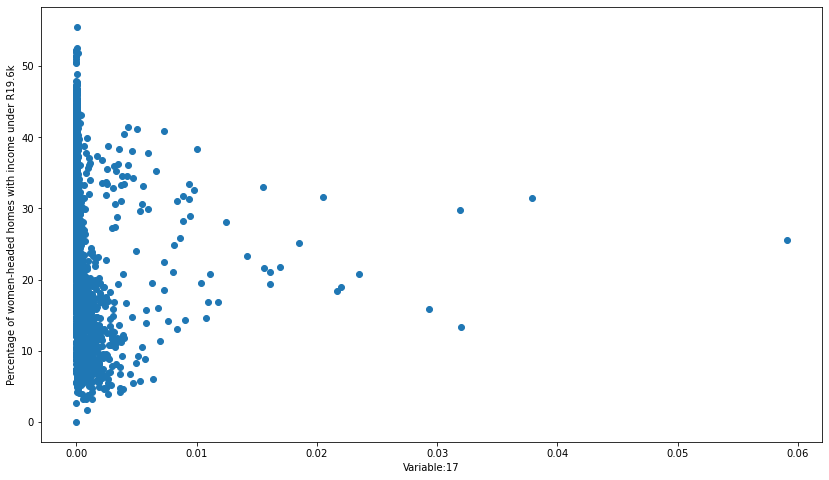

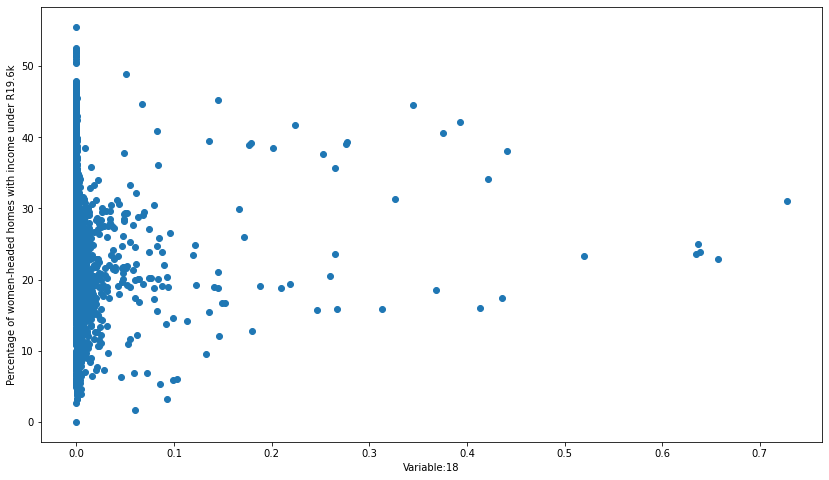

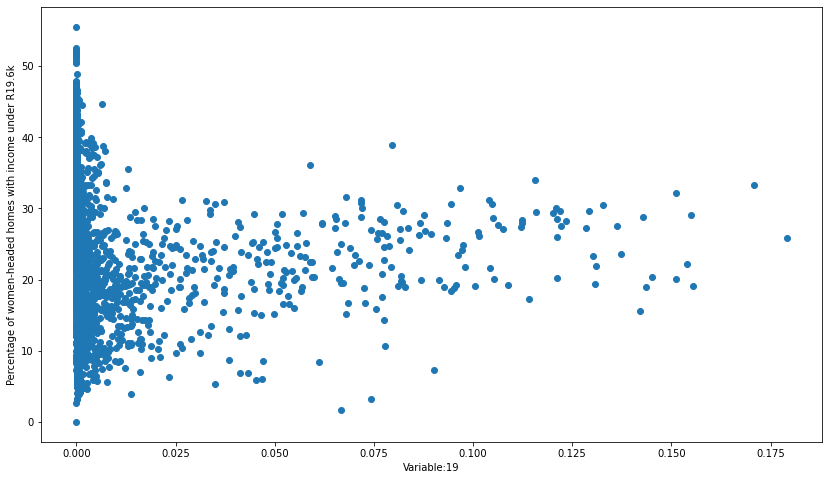

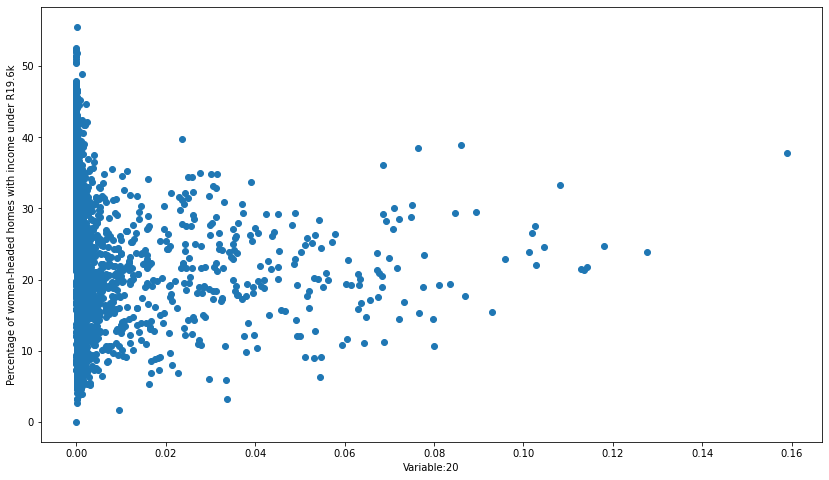

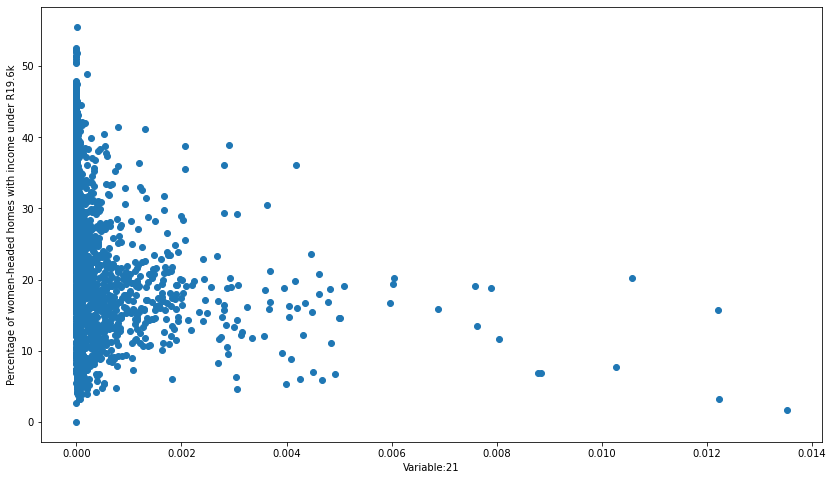

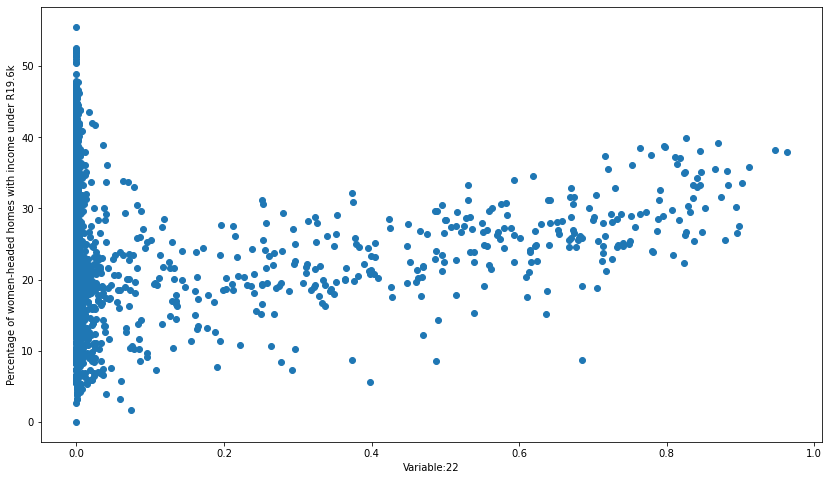

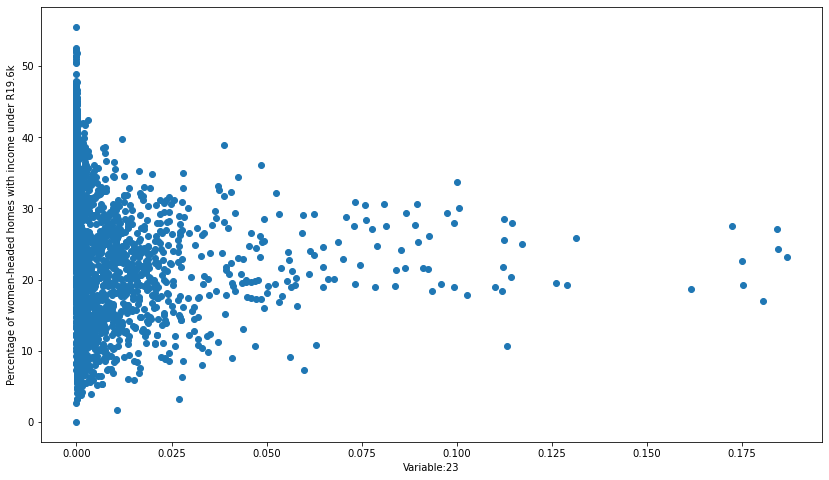

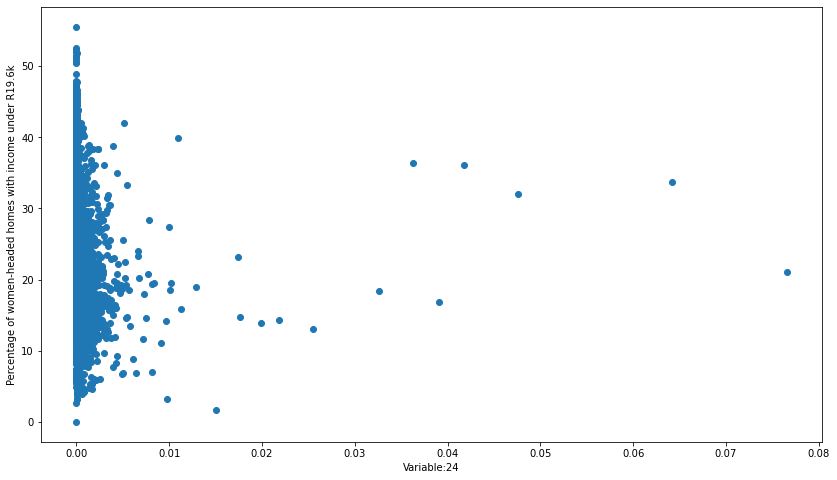

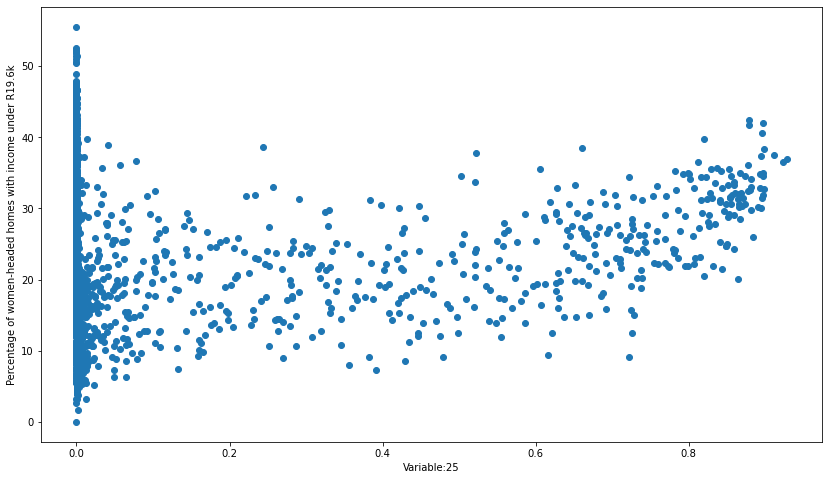

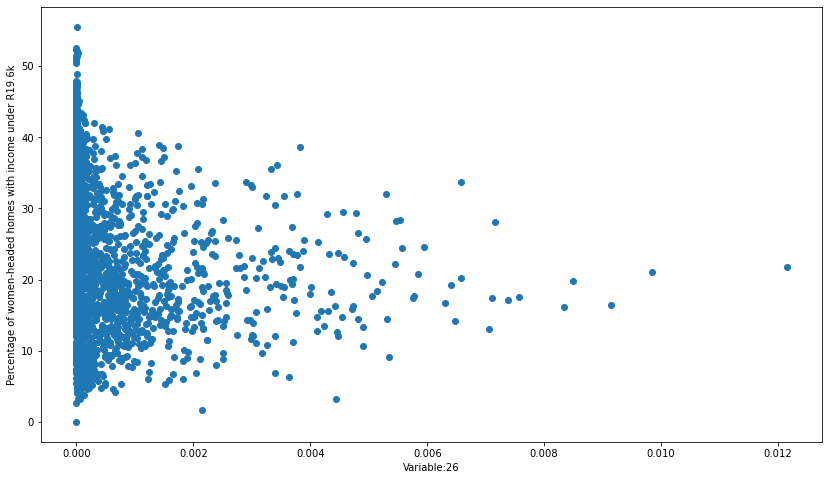

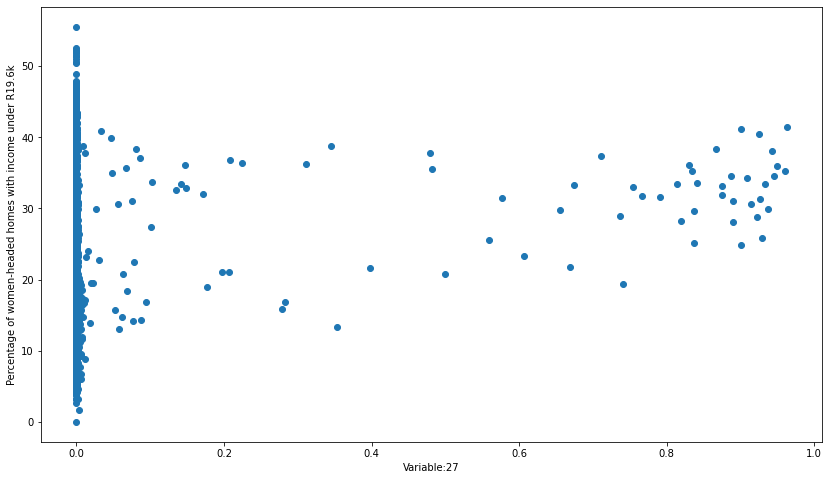

In [146]:
for var in train_trans.columns:
    plt.scatter(x=train_trans[var],y=train_copy['target'])
    plt.xlabel(f'Variable:{var}')
    plt.ylabel('Percentage of women-headed homes with income under R19.6k')
    plt.show()

In [163]:
poly_sample = train_copy[feat_whout_lang].join(train_trans)
poly_sample.head()

dw_01     dw_07    stv_01     pg_00     pg_01     pg_03        lat        lon    lln_01     pw_00    car_01    psa_00    psa_01    psa_04         0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25            26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46            47            48            49        50            51            52        53        54        55            56        57        58            59            60            61            62        63        64        65            66        67        68            69        70            71            72        73        74        75        76            77            78            79            80            81            82
0  0.000846  0.031466  0.716532  0.357455  0.563166  0.072996 -29.682270  24.734743  0.881175  0.742692  0.726273  0.260191  0.607898  0.121705  0.832913  0.012336  0.050939  0.076088  0.006371  0.000375  0.693743  0.010275  0.042428  0.063375  0.005307  0.000312  0.000152  0.000628  0.000939  0.000079  0.000005  0.002595  0.003876  0.000325  0.000019  0.005789  0.000485  0.000029  0.000041  0.000002  1.407514e-07  0.577828  0.008558  0.035339  0.052786  0.004420  0.000260  0.000127  0.000523  0.000782  0.000065  0.000004  0.002161  0.003228  0.000270  0.000016  0.004822  0.000404  0.000024  0.000034  0.000002  1.172336e-07  1.877465e-06  7.752342e-06  0.000012  9.695956e-07  5.709626e-08  0.000032  0.000048  0.000004  2.357592e-07  0.000071  0.000006  3.521543e-07  5.007366e-07  2.948671e-08  1.736374e-09  0.000132  0.000197  0.000017  9.734859e-07  0.000295  0.000025  1.454099e-06  0.000002  1.217552e-07  7.169756e-09  0.000441  0.000037  0.000002  0.000003  1.818661e-07  1.070949e-08  2.585997e-07  1.522808e-08  8.967308e-10  5.280549e-11
1  0.001253  0.123547  0.896359  0.698428  0.278006  0.015835 -29.119311  24.757737  0.933097  0.309294  0.855362  0.290228  0.549788  0.138647  0.879655  0.008445  0.011249  0.032431  0.030844  0.001308  0.773793  0.007429  0.009896  0.028528  0.027132  0.001150  0.000071  0.000095  0.000274  0.000260  0.000011  0.000127  0.000365  0.000347  0.000015  0.001052  0.001000  0.000042  0.000951  0.000040  1.709644e-06  0.680671  0.006535  0.008705  0.025095  0.023867  0.001012  0.000063  0.000084  0.000241  0.000229  0.000010  0.000111  0.000321  0.000305  0.000013  0.000925  0.000880  0.000037  0.000837  0.000035  1.503897e-06  6.023144e-07  8.023090e-07  0.000002  2.199824e-06  9.325418e-08  0.000001  0.000003  0.000003  1.242186e-07  0.000009  0.000008  3.581113e-07  8.034387e-06  3.405909e-07  1.443821e-08  0.000001  0.000004  0.000004  1.654646e-07  0.000012  0.000011  4.770199e-07  0.000011  4.536820e-07  1.923233e-08  0.000034  0.000032  0.000001  0.000031  1.307925e-06  5.544510e-08  2.934388e-05  1.243935e-06  5.273248e-08  2.235417e-09
2  0.004517  0.022632  0.834228  0.672452  0.154225  0.167494 -29.142276  25.094093  0.899991  0.323393  0.727780  0.186435  0.677005  0.114757  0.565546  0.015991  0.111270  0.148083  0.139687  0.000165  0.319842  0.009044  0.062928  0.083748  0.079000  0.000093  0.000256  0.001779  0.002368  0.002234  0.000003  0.012381  0.016477  0.015543  0.000018  0.021929  0.020685  0.000024  0.019513  0.000023  2.706584e-08  0.180886  0.005115  0.035589  0.047363  0.044678  0.000053  0.000145  0.001006  0.001339  0.001263  0.000001  0.007002  0.009319  0.008790  0.000010  0.012402  0.011699  0.000014  0.011035  0.000013  1.530698e-08  4.089250e-06  2.845375e-05  0.000038  3.572066e-05  4.207007e-08  0.000198  0.000263  0.000249  2.927313e-07  0.000351  0.000331  3.895814e-07  3.120293e-04  3.674930e-07  4.328155e-10  0.001378  0.0

In [164]:
poly_sample.shape

(2822, 97)

In [165]:
poly_sample['target'] = train['target']

In [166]:
poly_sample.head()

dw_01     dw_07    stv_01     pg_00     pg_01     pg_03        lat        lon    lln_01     pw_00    car_01    psa_00    psa_01    psa_04         0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25            26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46            47            48            49        50            51            52        53        54        55            56        57        58            59            60            61            62        63        64        65            66        67        68            69        70            71            72        73        74        75        76            77            78            79            80            81            82     target
0  0.000846  0.031466  0.716532  0.357455  0.563166  0.072996 -29.682270  24.734743  0.881175  0.742692  0.726273  0.260191  0.607898  0.121705  0.832913  0.012336  0.050939  0.076088  0.006371  0.000375  0.693743  0.010275  0.042428  0.063375  0.005307  0.000312  0.000152  0.000628  0.000939  0.000079  0.000005  0.002595  0.003876  0.000325  0.000019  0.005789  0.000485  0.000029  0.000041  0.000002  1.407514e-07  0.577828  0.008558  0.035339  0.052786  0.004420  0.000260  0.000127  0.000523  0.000782  0.000065  0.000004  0.002161  0.003228  0.000270  0.000016  0.004822  0.000404  0.000024  0.000034  0.000002  1.172336e-07  1.877465e-06  7.752342e-06  0.000012  9.695956e-07  5.709626e-08  0.000032  0.000048  0.000004  2.357592e-07  0.000071  0.000006  3.521543e-07  5.007366e-07  2.948671e-08  1.736374e-09  0.000132  0.000197  0.000017  9.734859e-07  0.000295  0.000025  1.454099e-06  0.000002  1.217552e-07  7.169756e-09  0.000441  0.000037  0.000002  0.000003  1.818661e-07  1.070949e-08  2.585997e-07  1.522808e-08  8.967308e-10  5.280549e-11  16.773757
1  0.001253  0.123547  0.896359  0.698428  0.278006  0.015835 -29.119311  24.757737  0.933097  0.309294  0.855362  0.290228  0.549788  0.138647  0.879655  0.008445  0.011249  0.032431  0.030844  0.001308  0.773793  0.007429  0.009896  0.028528  0.027132  0.001150  0.000071  0.000095  0.000274  0.000260  0.000011  0.000127  0.000365  0.000347  0.000015  0.001052  0.001000  0.000042  0.000951  0.000040  1.709644e-06  0.680671  0.006535  0.008705  0.025095  0.023867  0.001012  0.000063  0.000084  0.000241  0.000229  0.000010  0.000111  0.000321  0.000305  0.000013  0.000925  0.000880  0.000037  0.000837  0.000035  1.503897e-06  6.023144e-07  8.023090e-07  0.000002  2.199824e-06  9.325418e-08  0.000001  0.000003  0.000003  1.242186e-07  0.000009  0.000008  3.581113e-07  8.034387e-06  3.405909e-07  1.443821e-08  0.000001  0.000004  0.000004  1.654646e-07  0.000012  0.000011  4.770199e-07  0.000011  4.536820e-07  1.923233e-08  0.000034  0.000032  0.000001  0.000031  1.307925e-06  5.544510e-08  2.934388e-05  1.243935e-06  5.273248e-08  2.235417e-09  21.496661
2  0.004517  0.022632  0.834228  0.672452  0.154225  0.167494 -29.142276  25.094093  0.899991  0.323393  0.727780  0.186435  0.677005  0.114757  0.565546  0.015991  0.111270  0.148083  0.139687  0.000165  0.319842  0.009044  0.062928  0.083748  0.079000  0.000093  0.000256  0.001779  0.002368  0.002234  0.000003  0.012381  0.016477  0.015543  0.000018  0.021929  0.020685  0.000024  0.019513  0.000023  2.706584e-08  0.180886  0.005115  0.035589  0.047363  0.044678  0.000053  0.000145  0.001006  0.001339  0.001263  0.000001  0.007002  0.009319  0.008790  0.000010  0.012402  0.011699  0.000014  0.011035  0.000013  1.530698e-08  4.089250e-06  2.845375e-05  0.000038  3.572066e-05  4.207007e-08  0.000198  0.000263  0.000249  2.927313e-07  0.000351  0.000331  3.895814e-07  3.120293e-04  3.674930

In [167]:
x_poly = poly_sample.drop('target',axis=1)
y_poly = poly_sample['target']

In [168]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(x_poly, y_poly, random_state=11,test_size=0.45)

Score is 0.8856667847700196
Root Mean Square error: 3.5299880752197845


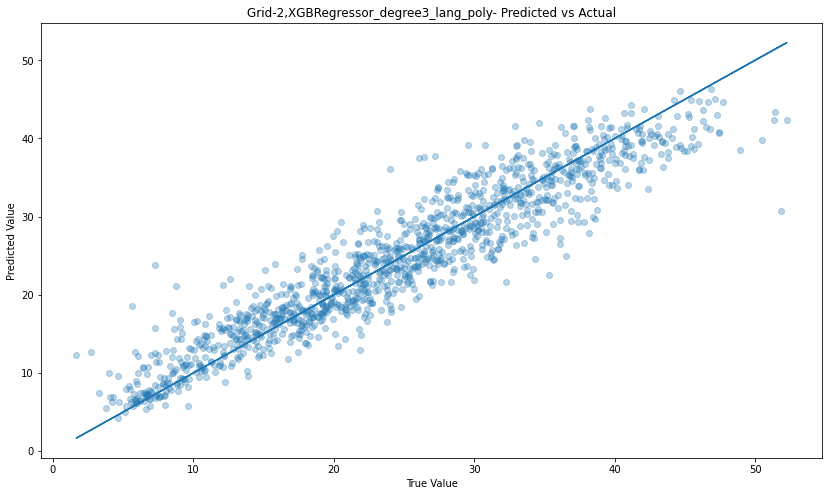

In [170]:
#Model check for my grid search XGboost Regressor
model_check(model=xgb_grid2, x_train=X_train_poly, x_test=X_test_poly, y_train=y_train, y_test=y_test, name='Grid-2,XGBRegressor_degree3_lang_poly')

#### Another day of exploring more polynomial options

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
plt.rcParams['figure.figsize'] = [14,8]
pd.set_option('display.max_column',500)

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')

In [5]:
train.head()

ward  total_households  total_individuals     target     dw_00  \
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841   
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940   
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545   
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914   
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575   

      dw_01     dw_02     dw_03     dw_04     dw_05     dw_06     dw_07  \
0  0.000846  0.005490  0.000676  0.000000  0.001372  0.005750  0.031466   
1  0.001253  0.004402  0.000000  0.002301  0.001323  0.007575  0.123547   
2  0.004517  0.008891  0.003986  0.007735  0.000956  0.006686  0.022632   
3  0.000000  0.006129  0.000000  0.000813  0.037245  0.005255  0.068909   
4  0.000655  0.001473  0.000598  0.006999  0.000818  0.004985  0.009150   

      dw_08     dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01  \
0  0.008080  0.002823  0.001431  0.008224      0      0  0.260191  0.607898   
1  0.151910  0.001486  0.001253  0.008010      0      0  0.290228  0.549788   
2  0.129902  0.000000  0.000000  0.004150      0      0  0.186435  0.677005   
3  0.218786  0.000000  0.000000  0.002947      0      0  0.281229  0.593281   
4  0.015382  0.008693  0.000000  0.000673      0      0  0.196687  0.517578   

     psa_02    psa_03    psa_04    stv_00    stv_01    car_00    car_01  \
0  0.000188  0.010018  0.121705  0.283468  0.716532  0.273727  0.726273   
1  0.000000  0.021336  0.138647  0.103641  0.896359  0.144638  0.855362   
2  0.000489  0.021315  0.114757  0.165772  0.834228  0.272220  0.727780   
3  0.000579  0.007249  0.117663  0.087768  0.912232  0.127875  0.872125   
4  0.000989  0.005148  0.279598  0.345975  0.654025  0.404507  0.595493   

     lln_00    lln_01    lan_00    lan_01    lan_02    lan_03    lan_04  \
0  0.118825  0.881175  0.832913  0.012336  0.001923  0.050939  0.000000   
1  0.066903  0.933097  0.879655  0.008445  0.000328  0.011249  0.000842   
2  0.100009  0.899991  0.565546  0.015991  0.001566  0.111270  0.004795   
3  0.029155  0.970845  0.743812  0.006530  0.001188  0.086423  0.006735   
4  0.133552  0.866448  0.422623  0.014352  0.000842  0.121869  0.007027   

     lan_05    lan_06    lan_07    lan_08    lan_09    lan_10    lan_11  \
0  0.000564  0.076088  0.006371  0.003663  0.000375  0.000372  0.004943   
1  0.001759  0.032431  0.030844  0.001646  0.001308  0.000994  0.000000   
2  0.002552  0.148083  0.139687  0.003165  0.000165  0.000779  0.001692   
3  0.002308  0.103244  0.038284  0.003080  0.000582  0.000000  0.000197   
4  0.002613  0.147363  0.081706  0.003044  0.000169  0.000643  0.001201   

     lan_12  lan_13    lan_14     pg_00     pg_01     pg_02     pg_03  \
0  0.002719       0  0.006793  0.357455  0.563166  0.004260  0.072996   
1  0.002439       0  0.028061  0.698428  0.278006  0.003695  0.015835   
2  0.002509       0  0.002200  0.672452  0.154225  0.002181  0.167494   
3  0.007442       0  0.000174  0.728014  0.263831  0.001806  0.000956   
4  0.004276       0  0.192272  0.753491  0.129654  0.004523  0.106953   

      pg_04    lgt_00     pw_00     pw_01     pw_02     pw_03     pw_04  \
0  0.002123  0.919424  0.742692  0.214027  0.019968  0.002848  0.007537   
1  0.004036  0.959259  0.309294  0.576844  0.018946  0.014566  0.057127   
2  0.003649  0.826164  0.323393  0.483376  0.083010  0.057560  0.010358   
3  0.005393  0.986151  0.677437  0.314194  0.002689  0.000000  0.000669   
4  0.005380  0.957376  0.771106  0.194743  0.009699  0.004859  0.001290   

      pw_05     pw_06  pw_07  pw_08 ADM4_PCODE        lat        lon        NL  
0  0.000000  0.012928      0      0  ZA4161001 -29.682270  24.734743  0.292039  
1  0.019092  0.004131      0      0  ZA4161002 -29.119311  24.757737  3.207775  
2  0.001421  0.040881      0      0  ZA4161003 -29.142276  25.094093  0.000000  
3  0.000000  0.005011      0      0

In [7]:
best_feat_21 = ['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']
best_feat_21

['dw_01',
 'lan_01',
 'psa_04',
 'lan_00',
 'stv_01',
 'pg_03',
 'lan_06',
 'lan_09',
 'dw_07',
 'lat',
 'psa_01',
 'lan_03',
 'NL',
 'lan_07',
 'pg_01',
 'lln_01',
 'lon',
 'pg_00',
 'pw_00',
 'car_01',
 'psa_00']

In [8]:
# i want to add household/individuals
train['house_per_ind'] = train['total_households']/train['total_individuals']
test['house_per_ind'] = test['total_households']/test['total_individuals']

In [9]:
target_col = 'target'

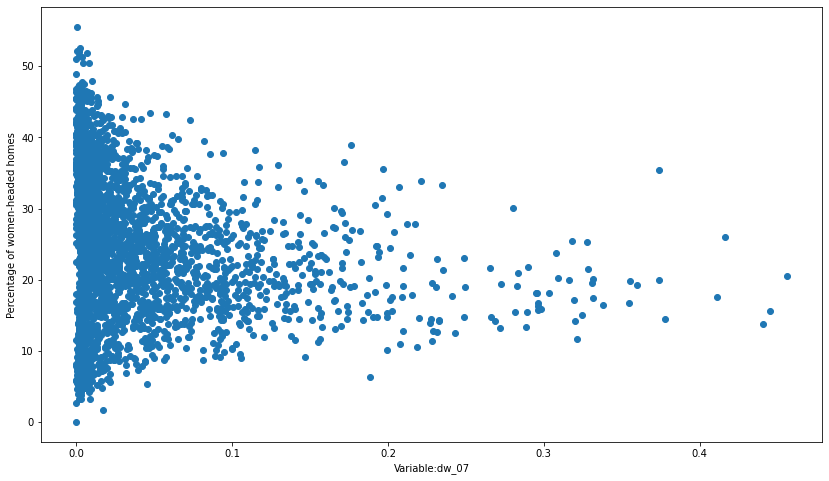

In [10]:
#distribution of dw_07(Informal dwelling) with target 
plt.scatter(x=train['dw_07'], y=train[target_col])
plt.xlabel('Variable:dw_07')
plt.ylabel('Percentage of women-headed homes')
plt.show()

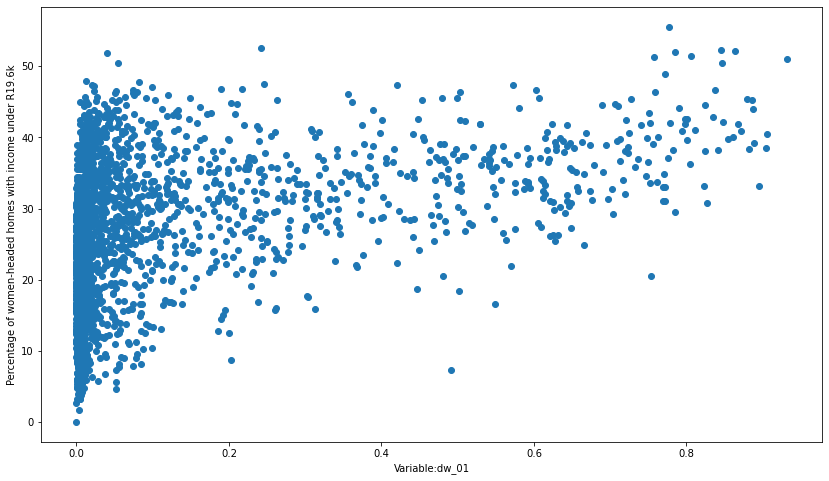

In [11]:
#relationship of dw_01 with target #
plt.scatter(x=train['dw_01'], y=train[target_col])
plt.xlabel('Variable:dw_01')
plt.ylabel('Percentage of women-headed homes with income under R19.6k')
plt.show()

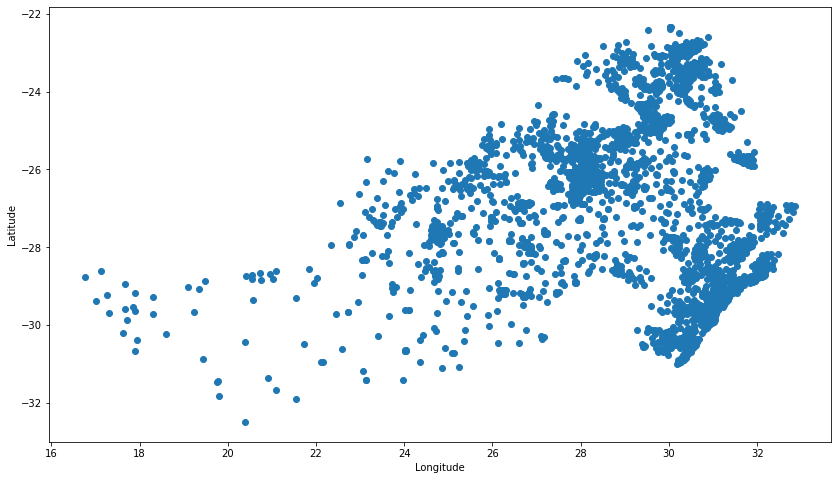

In [13]:
#Plotting lat vs lon let's see if the gives me an idea of the map
plt.scatter(x=train["lon"], y=train["lat"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

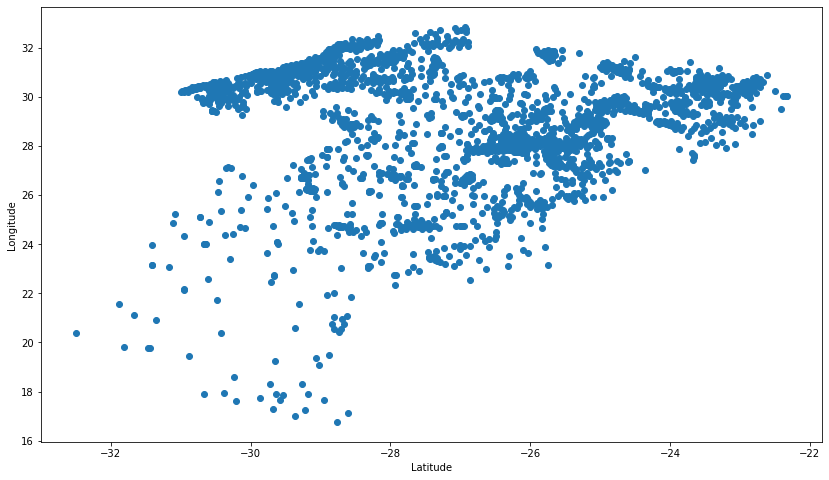

In [14]:
#x as lat, y as longitude
plt.scatter(x=train["lat"], y=train["lon"],)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

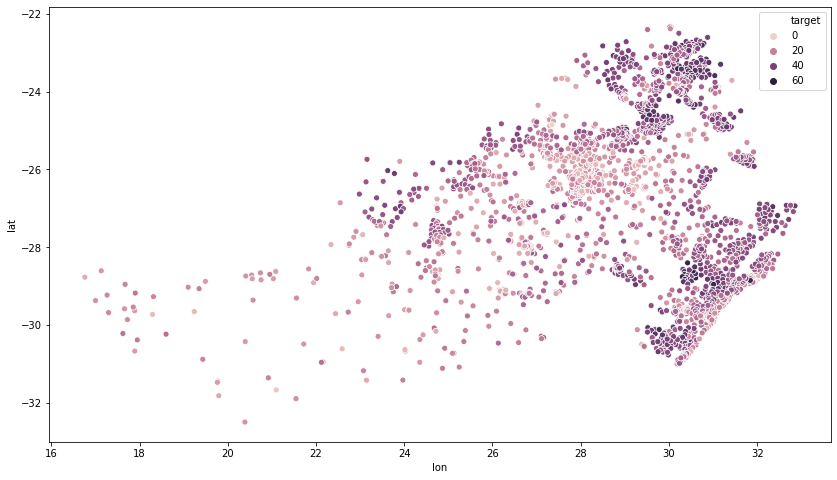

In [15]:
sns.scatterplot(x="lon", y="lat", data=train, hue=target_col)

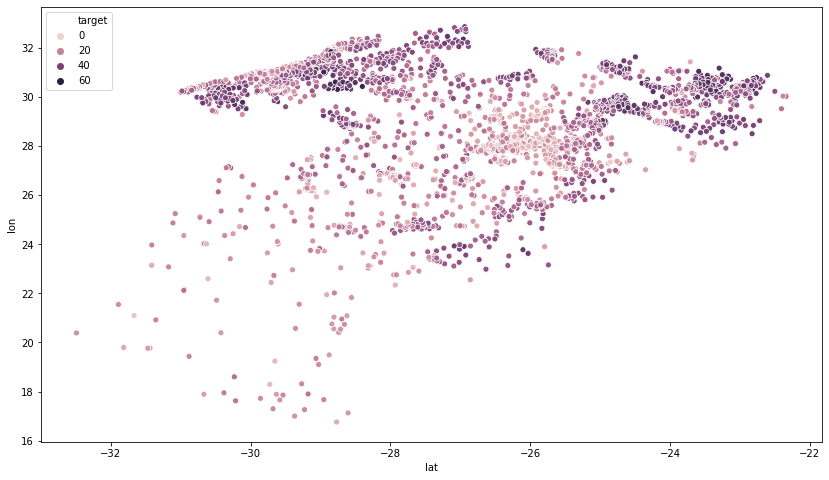

In [17]:
sns.scatterplot(x="lat", y="lon", data=train, hue=target_col)

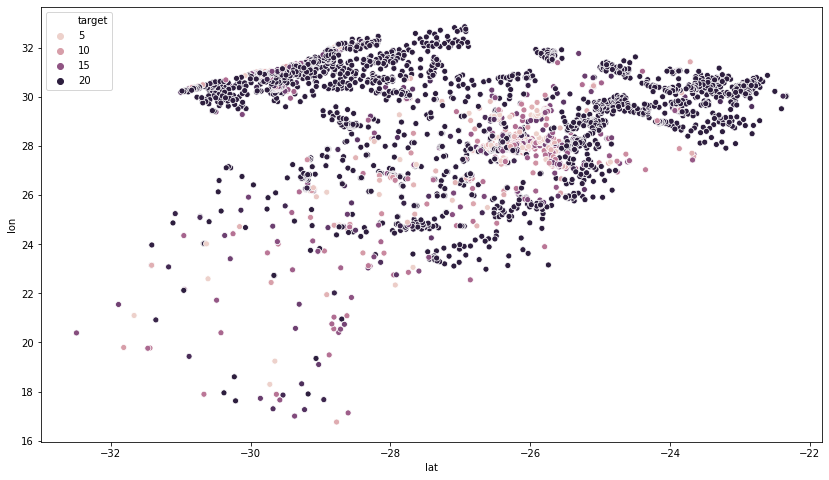

In [29]:
sns.scatterplot(x="lat", y="lon", data=train, hue=target_col, hue_norm=(7,20))

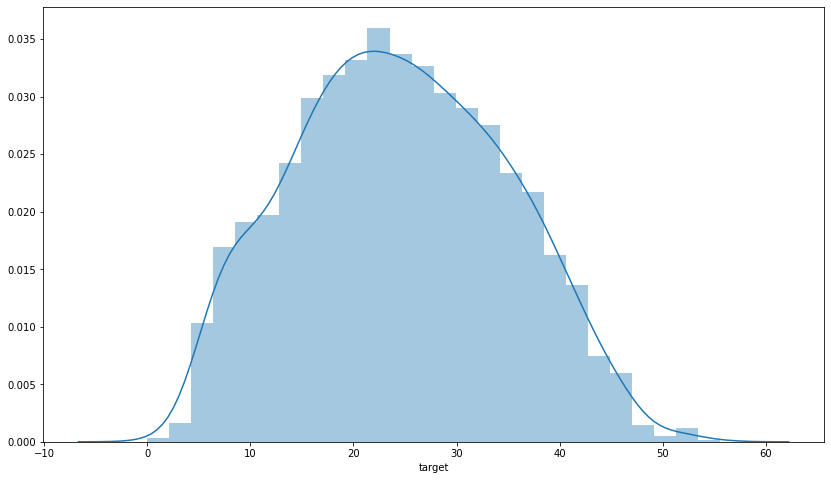

In [22]:
sns.distplot(train[target_col])

In [23]:
train.describe()['target']

count    2822.000000
mean       24.507554
std        10.294387
min         0.000000
25%        16.751556
50%        24.156670
75%        32.226553
max        55.528423
Name: target, dtype: float64

In [38]:
target_avg = train['target'].describe()['mean']
target_avg

24.507554434444103

In [39]:
target_std = train['target'].describe()['std']
target_std

10.294387405864656

In [40]:
def target_z_score(x):
    return (x - target_avg)/target_std

In [41]:
target_z_score(24.507554434444103)

0.0

In [42]:
train['z-score'] = train[target_col].apply(target_z_score)
train.head()

ward  total_households  total_individuals     target     dw_00  \
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841   
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940   
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545   
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914   
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575   

      dw_01     dw_02     dw_03     dw_04     dw_05     dw_06     dw_07  \
0  0.000846  0.005490  0.000676  0.000000  0.001372  0.005750  0.031466   
1  0.001253  0.004402  0.000000  0.002301  0.001323  0.007575  0.123547   
2  0.004517  0.008891  0.003986  0.007735  0.000956  0.006686  0.022632   
3  0.000000  0.006129  0.000000  0.000813  0.037245  0.005255  0.068909   
4  0.000655  0.001473  0.000598  0.006999  0.000818  0.004985  0.009150   

      dw_08     dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01  \
0  0.008080  0.002823  0.001431  0.008224      0      0  0.260191  0.607898   
1  0.151910  0.001486  0.001253  0.008010      0      0  0.290228  0.549788   
2  0.129902  0.000000  0.000000  0.004150      0      0  0.186435  0.677005   
3  0.218786  0.000000  0.000000  0.002947      0      0  0.281229  0.593281   
4  0.015382  0.008693  0.000000  0.000673      0      0  0.196687  0.517578   

     psa_02    psa_03    psa_04    stv_00    stv_01    car_00    car_01  \
0  0.000188  0.010018  0.121705  0.283468  0.716532  0.273727  0.726273   
1  0.000000  0.021336  0.138647  0.103641  0.896359  0.144638  0.855362   
2  0.000489  0.021315  0.114757  0.165772  0.834228  0.272220  0.727780   
3  0.000579  0.007249  0.117663  0.087768  0.912232  0.127875  0.872125   
4  0.000989  0.005148  0.279598  0.345975  0.654025  0.404507  0.595493   

     lln_00    lln_01    lan_00    lan_01    lan_02    lan_03    lan_04  \
0  0.118825  0.881175  0.832913  0.012336  0.001923  0.050939  0.000000   
1  0.066903  0.933097  0.879655  0.008445  0.000328  0.011249  0.000842   
2  0.100009  0.899991  0.565546  0.015991  0.001566  0.111270  0.004795   
3  0.029155  0.970845  0.743812  0.006530  0.001188  0.086423  0.006735   
4  0.133552  0.866448  0.422623  0.014352  0.000842  0.121869  0.007027   

     lan_05    lan_06    lan_07    lan_08    lan_09    lan_10    lan_11  \
0  0.000564  0.076088  0.006371  0.003663  0.000375  0.000372  0.004943   
1  0.001759  0.032431  0.030844  0.001646  0.001308  0.000994  0.000000   
2  0.002552  0.148083  0.139687  0.003165  0.000165  0.000779  0.001692   
3  0.002308  0.103244  0.038284  0.003080  0.000582  0.000000  0.000197   
4  0.002613  0.147363  0.081706  0.003044  0.000169  0.000643  0.001201   

     lan_12  lan_13    lan_14     pg_00     pg_01     pg_02     pg_03  \
0  0.002719       0  0.006793  0.357455  0.563166  0.004260  0.072996   
1  0.002439       0  0.028061  0.698428  0.278006  0.003695  0.015835   
2  0.002509       0  0.002200  0.672452  0.154225  0.002181  0.167494   
3  0.007442       0  0.000174  0.728014  0.263831  0.001806  0.000956   
4  0.004276       0  0.192272  0.753491  0.129654  0.004523  0.106953   

      pg_04    lgt_00     pw_00     pw_01     pw_02     pw_03     pw_04  \
0  0.002123  0.919424  0.742692  0.214027  0.019968  0.002848  0.007537   
1  0.004036  0.959259  0.309294  0.576844  0.018946  0.014566  0.057127   
2  0.003649  0.826164  0.323393  0.483376  0.083010  0.057560  0.010358   
3  0.005393  0.986151  0.677437  0.314194  0.002689  0.000000  0.000669   
4  0.005380  0.957376  0.771106  0.194743  0.009699  0.004859  0.001290   

      pw_05     pw_06  pw_07  pw_08 ADM4_PCODE        lat        lon  \
0  0.000000  0.012928      0      0  ZA4161001 -29.682270  24.734743   
1  0.019092  0.004131      0      0  ZA4161002 -29.119311  24.757737   
2  0.001421  0.040881      0      0  ZA4161003 -29.142276  25.094093   
3  0.000000  0.005011      0      0  ZA4161004 -29.372052  24.942867   

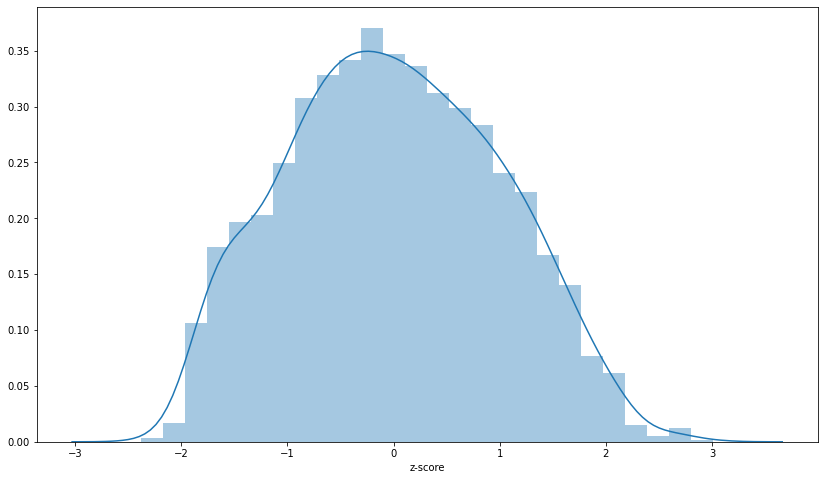

In [43]:
sns.distplot(train['z-score'])

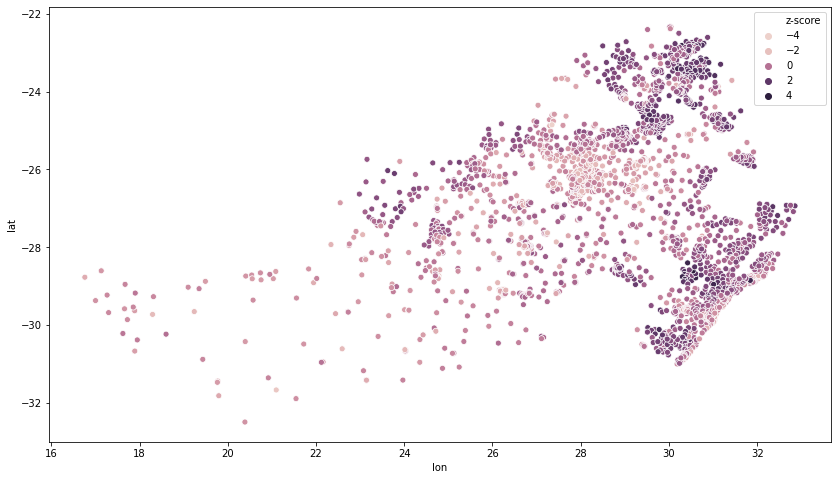

In [48]:
sns.scatterplot(x="lon", y="lat", data=train, hue='z-score')

In [1]:
import plotly.express as px
import pandas as pd

In [15]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')

In [14]:
plt.rcParams['figure.figsize'] = [14,8]
pd.set_option('display.max_column',500)

In [16]:
best_feat_21 = ['dw_01','lan_01','psa_04','lan_00','stv_01','pg_03','lan_06',
                'lan_09','dw_07','lat','psa_01','lan_03','NL','lan_07','pg_01','lln_01','lon',
                'pg_00','pw_00','car_01','psa_00']

In [17]:
!conda install -c districtdatalabs yellowbrick

^C


In [21]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
train_to_use = train[best_feat_21]

In [22]:
X=train_to_use
y=train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=11, test_size= 0.45)

In [24]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [ ]:
#XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7)

In [32]:
poly_Xtrain = pd.DataFrame(poly_feat.fit_transform(X_train), columns=poly_feat.get_feature_names_out())
poly_Xtest = pd.DataFrame(poly_feat.transform(X_test), columns=poly_feat.get_feature_names_out())

In [33]:
poly_Xtrain.head()

dw_01    lan_01    psa_04    lan_00    stv_01     pg_03    lan_06  \
0  0.003691  0.143271  0.100685  0.482460  0.529327  0.541841  0.034951   
1  0.000944  0.011900  0.097156  0.021792  0.684658  0.000262  0.784124   
2  0.013077  0.010114  0.150993  0.002845  0.828153  0.001646  0.008528   
3  0.002051  0.006972  0.176305  0.875600  0.741824  0.051514  0.003492   
4  0.029721  0.010854  0.152999  0.004605  0.895574  0.000330  0.005157   

     lan_09     dw_07        lat    psa_01    lan_03         NL    lan_07  \
0  0.007236  0.008476 -26.205780  0.631169  0.032237  36.081412  0.017966   
1  0.000249  0.060187 -27.964342  0.565817  0.106800  38.294318  0.022231   
2  0.000000  0.006545 -22.806495  0.401131  0.000747   1.782807  0.003104   
3  0.000000  0.003177 -30.380200  0.557931  0.000861   0.100758  0.011534   
4  0.002479  0.010953 -25.037557  0.478333  0.000654   9.325149  0.002312   

      pg_01    lln_01        lon     pg_00     pw_00    car_01    psa_00  \
0  0.022723  0.728104  28.487829  0.416536  0.887841  0.361569  0.226497   
1  0.002111  0.856311  26.797835  0.995664  0.735852  0.751255  0.287778   
2  0.000585  0.982390  28.838707  0.997017  0.135657  0.813252  0.427658   
3  0.878981  0.768497  17.949265  0.064816  0.409319  0.761638  0.220337   
4  0.000167  0.989111  29.509332  0.994724  0.045353  0.823654  0.341107   

        dw_01^2  dw_01 lan_01  dw_01 psa_04  dw_01 lan_00  dw_01 stv_01  \
0  1.362492e-05      0.000529      0.000372      0.001781      0.001954   
1  8.903845e-07      0.000011      0.000092      0.000021      0.000646   
2  1.709974e-04      0.000132      0.001974      0.000037      0.010829   
3  4.207126e-06      0.000014      0.000362      0.001796      0.001522   
4  8.833440e-04      0.000323      0.004547      0.000137      0.026617   

    dw_01 pg_03  dw_01 lan_06  dw_01 lan_09  dw_01 dw_07  dw_01 lat  \
0  2.000040e-03      0.000129  2.670814e-05     0.000031  -0.096731   
1  2.470602e-07      0.000740  2.352773e-07     0.000057  -0.026387   
2  2.153036e-05      0.000112  0.000000e+00     0.000086  -0.298231   
3  1.056609e-04      0.000007  0.000000e+00     0.000007  -0.062314   
4  9.796970e-06      0.000153  7.368071e-05     0.000326  -0.744144   

   dw_01 psa_01  dw_01 lan_03  dw_01 NL  dw_01 lan_07  dw_01 pg_01  \
0      0.002330      0.000119  0.133184      0.000066     0.000084   
1      0.000534      0.000101  0.036135      0.000021     0.000002   
2      0.005245      0.000010  0.023313      0.000041     0.000008   
3      0.001144      0.000002  0.000207      0.000024     0.001803   
4      0.014217      0.000019  0.277154      0.000069     0.000005   

   dw_01 lln_01  dw_01 lon  dw_01 pg_00  dw_01 pw_00  dw_01 car_01  \
0      0.002688   0.105154     0.001538     0.003277      0.001335   
1      0.000808   0.025286     0.000940     0.000694      0.000709   
2      0.012846   0.377112     0.013038     0.001774      0.010635   
3      0.001576   0.036816     0.000133     0.000840      0.001562   
4      0.029397   0.877050     0.029564     0.001348      0.024480   

   dw_01 psa_00  lan_01^2  lan_01 psa_04  lan_01 lan_00  lan_01 stv_01  \
0      0.000836  0.020527       0.014425       0.069122       0.075837   
1      0.000272  0.000142       0.001156       0.000259       0.008147   
2      0.005592  0.000102       0.001527       0.000029       0.008376   
3      0.000452  0.000049       0.001229       0.006105       0.005172   
4      0.010138  0.000118       0.001661       0.000050       0.009721   

   lan_01 pg_03  lan_01 lan_06  lan_01 lan_09  lan_01 dw_07  lan_01 lat  \
0      0.077630       0.005007       0.001037      0.001214   -3.754523   
1      0.000003       0.009331       0.000003      0.000716   -0.332775   
2      0.000017       0.000086       0.000000      0.000066   -0.230667   
3      0.000359       0.000024       0.000000      0.000022   -0.211810   
4      0.000004       0.000056       0.000027      0.000119   -0.271762   

   lan_01 psa_01  l

In [28]:
poly_feat.feature_names_in_

array(['dw_01', 'lan_01', 'psa_04', 'lan_00', 'stv_01', 'pg_03', 'lan_06',
       'lan_09', 'dw_07', 'lat', 'psa_01', 'lan_03', 'NL', 'lan_07',
       'pg_01', 'lln_01', 'lon', 'pg_00', 'pw_00', 'car_01', 'psa_00'],
      dtype=object)

In [31]:
poly_feat.get_feature_names_out()

array(['dw_01', 'lan_01', 'psa_04', 'lan_00', 'stv_01', 'pg_03', 'lan_06',
       'lan_09', 'dw_07', 'lat', 'psa_01', 'lan_03', 'NL', 'lan_07',
       'pg_01', 'lln_01', 'lon', 'pg_00', 'pw_00', 'car_01', 'psa_00',
       'dw_01^2', 'dw_01 lan_01', 'dw_01 psa_04', 'dw_01 lan_00',
       'dw_01 stv_01', 'dw_01 pg_03', 'dw_01 lan_06', 'dw_01 lan_09',
       'dw_01 dw_07', 'dw_01 lat', 'dw_01 psa_01', 'dw_01 lan_03',
       'dw_01 NL', 'dw_01 lan_07', 'dw_01 pg_01', 'dw_01 lln_01',
       'dw_01 lon', 'dw_01 pg_00', 'dw_01 pw_00', 'dw_01 car_01',
       'dw_01 psa_00', 'lan_01^2', 'lan_01 psa_04', 'lan_01 lan_00',
       'lan_01 stv_01', 'lan_01 pg_03', 'lan_01 lan_06', 'lan_01 lan_09',
       'lan_01 dw_07', 'lan_01 lat', 'lan_01 psa_01', 'lan_01 lan_03',
       'lan_01 NL', 'lan_01 lan_07', 'lan_01 pg_01', 'lan_01 lln_01',
       'lan_01 lon', 'lan_01 pg_00', 'lan_01 pw_00', 'lan_01 car_01',
       'lan_01 psa_00', 'psa_04^2', 'psa_04 lan_00', 'psa_04 stv_01',
       'psa_04 pg_03', 'ps

Score is 0.8764188112213044
Root Mean Square error: 3.6699759158269623


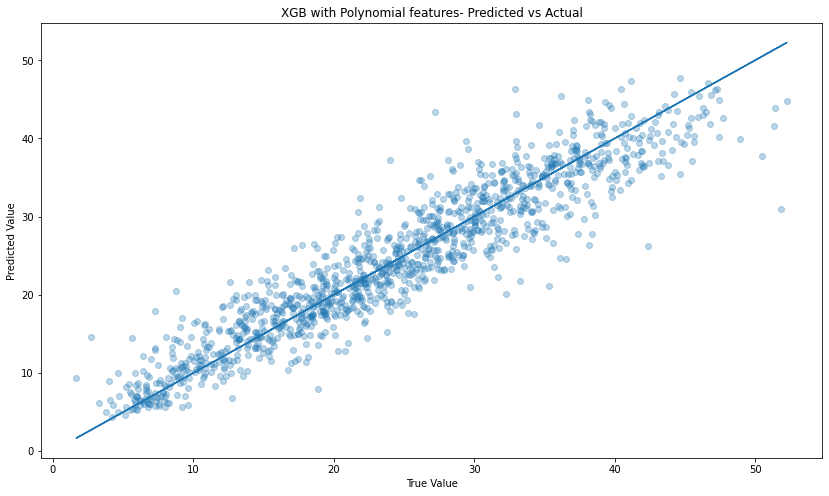

In [38]:
model_check(model=xgb_reg,x_train=poly_Xtrain, x_test=poly_Xtest, y_train=y_train, y_test=y_test, name='XGB with Polynomial features')

In [ ]:
def cross_validate(num_splits, train, feat, target, model):
    kf = KFold(n_splits=num_splits, shuffle=False)
    scores=[]
    
    for train_index, test_index in kf.split(train):
        model.fit(train[feat].iloc[train_index], train[target_col].iloc[train_index])
        prediction = model.predict(train[feat].iloc[test_index])
        r_mse = sqrt(mean_squared_error(train[target_col].iloc[test_index], prediction))
        scores.append(r_mse)
        print(r_mse)
    return (f'Average score in {num_splits}-fold CV: {np.mean(scores)}')

In [37]:
from math import sqrt
import numpy as np

from sklearn.metrics import mean_squared_error

In [39]:
from sklearn.model_selection import KFold, GridSearchCV

In [46]:
def new_cross_validate(num_splits, train, target, model):
    kf = KFold(n_splits=num_splits, shuffle=False)
    scores=[]
    
    for train_index, test_index in kf.split(train):
        model.fit(train.iloc[train_index], target.iloc[train_index])
        prediction = model.predict(train.iloc[test_index])
        r_mse = sqrt(mean_squared_error(target.iloc[test_index], prediction))
        scores.append(r_mse)
        print(r_mse)
    return(f'Average score in {num_splits}-fold CV: {np.mean(scores)}')

In [41]:
#pd.DataFrame(poly_feat.fit_transform(X_train), columns=poly_feat.get_feature_names_out())
X_poly = pd.DataFrame(poly_feat.fit_transform(X), columns=poly_feat.get_feature_names_out())

In [42]:
X_poly.head()

dw_01    lan_01    psa_04    lan_00    stv_01     pg_03    lan_06  \
0  0.000846  0.012336  0.121705  0.832913  0.716532  0.072996  0.076088   
1  0.001253  0.008445  0.138647  0.879655  0.896359  0.015835  0.032431   
2  0.004517  0.015991  0.114757  0.565546  0.834228  0.167494  0.148083   
3  0.000000  0.006530  0.117663  0.743812  0.912232  0.000956  0.103244   
4  0.000655  0.014352  0.279598  0.422623  0.654025  0.106953  0.147363   

     lan_09     dw_07        lat    psa_01    lan_03        NL    lan_07  \
0  0.000375  0.031466 -29.682270  0.607898  0.050939  0.292039  0.006371   
1  0.001308  0.123547 -29.119311  0.549788  0.011249  3.207775  0.030844   
2  0.000165  0.022632 -29.142276  0.677005  0.111270  0.000000  0.139687   
3  0.000582  0.068909 -29.372052  0.593281  0.086423  2.038778  0.038284   
4  0.000169  0.009150 -29.409381  0.517578  0.121869  0.000000  0.081706   

      pg_01    lln_01        lon     pg_00     pw_00    car_01    psa_00  \
0  0.563166  0.881175  24.734743  0.357455  0.742692  0.726273  0.260191   
1  0.278006  0.933097  24.757737  0.698428  0.309294  0.855362  0.290228   
2  0.154225  0.899991  25.094093  0.672452  0.323393  0.727780  0.186435   
3  0.263831  0.970845  24.942867  0.728014  0.677437  0.872125  0.281229   
4  0.129654  0.866448  25.290165  0.753491  0.771106  0.595493  0.196687   

        dw_01^2  dw_01 lan_01  dw_01 psa_04  dw_01 lan_00  dw_01 stv_01  \
0  7.152460e-07      0.000010      0.000103      0.000704      0.000606   
1  1.569733e-06      0.000011      0.000174      0.001102      0.001123   
2  2.040332e-05      0.000072      0.000518      0.002555      0.003768   
3  0.000000e+00      0.000000      0.000000      0.000000      0.000000   
4  4.284218e-07      0.000009      0.000183      0.000277      0.000428   

   dw_01 pg_03  dw_01 lan_06  dw_01 lan_09  dw_01 dw_07  dw_01 lat  \
0     0.000062      0.000064  3.172883e-07     0.000027  -0.025103   
1     0.000020      0.000041  1.638195e-06     0.000155  -0.036483   
2     0.000757      0.000669  7.431238e-07     0.000102  -0.131636   
3     0.000000      0.000000  0.000000e+00     0.000000  -0.000000   
4     0.000070      0.000096  1.108164e-07     0.000006  -0.019250   

   dw_01 psa_01  dw_01 lan_03  dw_01 NL  dw_01 lan_07  dw_01 pg_01  \
0      0.000514      0.000043  0.000247      0.000005     0.000476   
1      0.000689      0.000014  0.004019      0.000039     0.000348   
2      0.003058      0.000503  0.000000      0.000631     0.000697   
3      0.000000      0.000000  0.000000      0.000000     0.000000   
4      0.000339      0.000080  0.000000      0.000053     0.000085   

   dw_01 lln_01  dw_01 lon  dw_01 pg_00  dw_01 pw_00  dw_01 car_01  \
0      0.000745   0.020919     0.000302     0.000628      0.000614   
1      0.001169   0.031019     0.000875     0.000388      0.001072   
2      0.004065   0.113350     0.003037     0.001461      0.003287   
3      0.000000   0.000000     0.000000     0.000000      0.000000   
4      0.000567   0.016553     0.000493     0.000505      0.000390   

   dw_01 psa_00  lan_01^2  lan_01 psa_04  lan_01 lan_00  lan_01 stv_01  \
0      0.000220  0.000152       0.001501       0.010275       0.008839   
1      0.000364  0.000071       0.001171       0.007429       0.007570   
2      0.000842  0.000256       0.001835       0.009044       0.013340   
3      0.000000  0.000043       0.000768       0.004857       0.005957   
4      0.000129  0.000206       0.004013       0.006066       0.009387   

   lan_01 pg_03  lan_01 lan_06  lan_01 lan_09  lan_01 dw_07  lan_01 lat  \
0      0.000901       0.000939       0.000005      0.000388   -0.366174   
1      0.000134       0.000274       0.000011      0.001043   -0.245917   
2      0.002678       0.002368       0.000003      0.000362   -0.466020   
3      0.000006       0.000674       0.000004      0.000450   -0.191812   
4      0.001535       0.002115       0.000002      0.000131   -0.422089   

   lan_01 psa_01  lan_01 lan_03

In [47]:
new_cross_validate(num_splits=5, train=X_poly, target=y, model=xgb_reg)

3.744996009629142
4.013121191529136
4.731261529551988
4.047766606308274
4.264389065678052


'Average score in 5-fold CV: 4.160306880539318'

Score is 0.894476216062552
Root Mean Square error: 3.3912687499303997


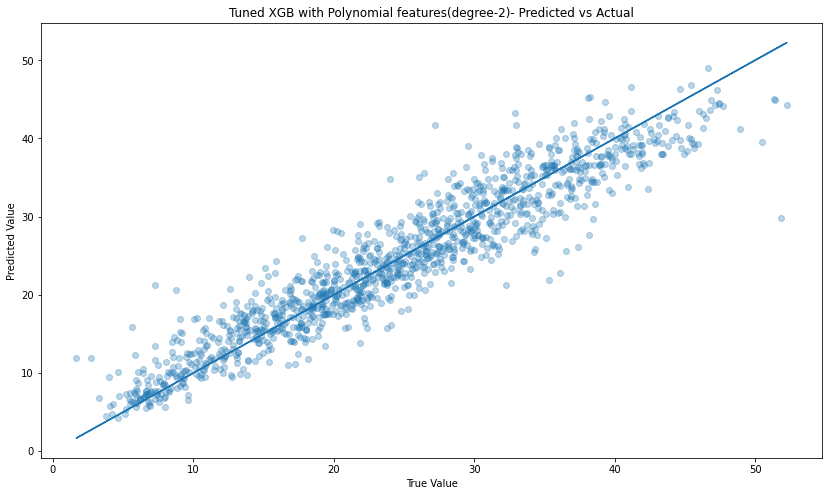

In [48]:
#let's try with the tuned model we have
tuned_xgb = XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7)
model_check(model=tuned_xgb,x_train=poly_Xtrain, x_test=poly_Xtest, y_train=y_train, y_test=y_test, name='Tuned XGB with Polynomial features(degree-2)')

In [49]:
# Average fold score - 3.975
# Root mean square error - 3.3646

In [50]:
new_cross_validate(num_splits=5, train=X_poly, target=y, model=xgb_reg)

3.744996009629142
4.013121191529136
4.731261529551988
4.047766606308274
4.264389065678052


'Average score in 5-fold CV: 4.160306880539318'

In [54]:
tuned_x

0.1

In [ ]:
grid_3 = GridSearchCV(estimator=XGBRegressor(),
                    param_grid={"learning_rate": (0.05, 0.10, 0.15),
                                "max_depth": [ 3, 4, 5, 6, 8],
                                "min_child_weight": [ 1, 3, 5, 7],
                                "gamma":[ 0.0, 0.1, 0.2],
                                "colsample_bytree":[ 0.3, 0.4],},
                    cv=, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

### Polynomial Features trial for deifferent degrees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt

from xgboost import XGBRegressor

In [2]:
def new_cross_validate(num_splits, train, target, model):
    kf = KFold(n_splits=num_splits, shuffle=False)
    scores=[]
    
    for train_index, test_index in kf.split(train):
        model.fit(train.iloc[train_index], target.iloc[train_index])
        prediction = model.predict(train.iloc[test_index])
        r_mse = sqrt(mean_squared_error(target.iloc[test_index], prediction))
        scores.append(r_mse)
        print(r_mse)
    return(f'Average score in {num_splits}-fold CV: {np.mean(scores)}')

In [3]:
def model_check(model,x_train,x_test,y_train,y_test,name):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print(f'Score is {model.score(x_test,y_test)}')
    print(f'Root Mean Square error: {sqrt(mean_squared_error(y_test,prediction))}')
    
    #Plotting predicted vs actual
    plt.title(f'{name}- Predicted vs Actual')
    plt.scatter(y_test, prediction, alpha=0.3)
    plt.plot(y_test,y_test) # A straight line - we want to be close to this
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')

In [5]:
train.head()

ward  total_households  total_individuals     target  ...  ADM4_PCODE        lat        lon        NL
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  ...   ZA4161001 -29.682270  24.734743  0.292039
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  ...   ZA4161002 -29.119311  24.757737  3.207775
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  ...   ZA4161003 -29.142276  25.094093  0.000000
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  ...   ZA4161004 -29.372052  24.942867  2.038778
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  ...   ZA4161005 -29.409381  25.290165  0.000000

[5 rows x 63 columns]

In [6]:
best_feat_21 = ['dw_01','lan_01','psa_04','lan_00','stv_01','pg_03','lan_06',
                'lan_09','dw_07','lat','psa_01','lan_03','NL','lan_07','pg_01','lln_01','lon',
                'pg_00','pw_00','car_01','psa_00']

In [7]:
train_to_use = train[best_feat_21]

In [8]:
X=train_to_use
y=train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=11, test_size= 0.45)

In [10]:
trial_degree = [2,3,4]

----------------------------------------------------------
This is the trial for degree 2
Score is 0.894476216062552
Root Mean Square error: 3.3912687499303997


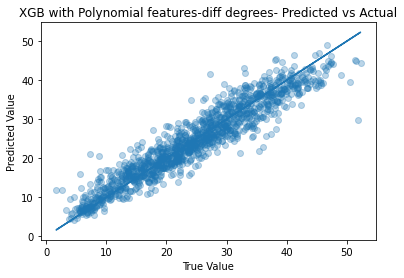

End of trial for degree2


-----------------------------------------------------------
----------------------------------------------------------
This is the trial for degree 3
Score is 0.8937247914388181
Root Mean Square error: 3.403321778694643


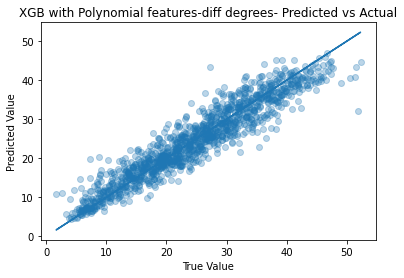

End of trial for degree3


-----------------------------------------------------------
----------------------------------------------------------
This is the trial for degree 4
Score is 0.8982173299852498
Root Mean Square error: 3.3306112878144694


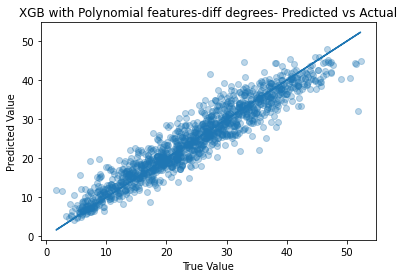

End of trial for degree4


-----------------------------------------------------------


In [11]:
for degree in trial_degree:
    xgb_reg = XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7)
    
    print('----------------------------------------------------------')
    print(f'This is the trial for degree {degree}')
    poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
    poly_Xtrain = pd.DataFrame(poly_feat.fit_transform(X_train), columns=poly_feat.get_feature_names_out())
    poly_Xtest = pd.DataFrame(poly_feat.transform(X_test), columns=poly_feat.get_feature_names_out())
    
    model_check(model=xgb_reg,x_train=poly_Xtrain, x_test=poly_Xtest, y_train=y_train, y_test=y_test, name='XGB with Polynomial features-diff degrees')
    
    print(f'End of trial for degree{degree}')
    print('\n')
    print('-----------------------------------------------------------')

In [13]:
tuned_xgb_reg = XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7)
poly_feat_4 = PolynomialFeatures(degree=4, include_bias=False)
poly_4_train = pd.DataFrame(poly_feat_4.fit_transform(train_to_use), columns=poly_feat_4.get_feature_names_out())
new_cross_validate(num_splits=5, train=poly_4_train, target=train['target'], model=tuned_xgb_reg)

3.616377218385287
3.709967366033096
4.434222986261908
3.906499938779402
3.923888223887289


'Average score in 5-fold CV: 3.918191146669396'

In [14]:
poly_4_train.head()

dw_01    lan_01    psa_04    lan_00  ...  car_01^3 psa_00  car_01^2 psa_00^2  car_01 psa_00^3  psa_00^4
0  0.000846  0.012336  0.121705  0.832913  ...         0.099676           0.035710         0.012793  0.004583
1  0.001253  0.008445  0.138647  0.879655  ...         0.181631           0.061628         0.020911  0.007095
2  0.004517  0.015991  0.114757  0.565546  ...         0.071867           0.018410         0.004716  0.001208
3  0.000000  0.006530  0.117663  0.743812  ...         0.186550           0.060156         0.019398  0.006255
4  0.000655  0.014352  0.279598  0.422623  ...         0.041534           0.013718         0.004531  0.001497

[5 rows x 12649 columns]

In [15]:
#7th submission
#XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate= 0.1,max_depth= 8,min_child_weight=7)
model = tuned_xgb_reg
model.fit(poly_4_train, train['target'])

test_to_use = test[best_feat_21]
poly_4_test = pd.DataFrame(poly_feat_4.transform(test_to_use), columns=poly_feat_4.get_feature_names_out())

In [17]:
sample_sub['target'] = model.predict(poly_4_test)
sample_sub.to_csv('Submission7.csv',index=False)